## 选择势函数

In [16]:
from calorine.calculators import CPUNEP
from ase.calculators.lammpslib import LAMMPSlib

calc = CPUNEP('nep.txt')

## 验证训练集

14102
0_E_rmse: 6.72 meV/atom
0_F_rmse: 78.78 meV/Å


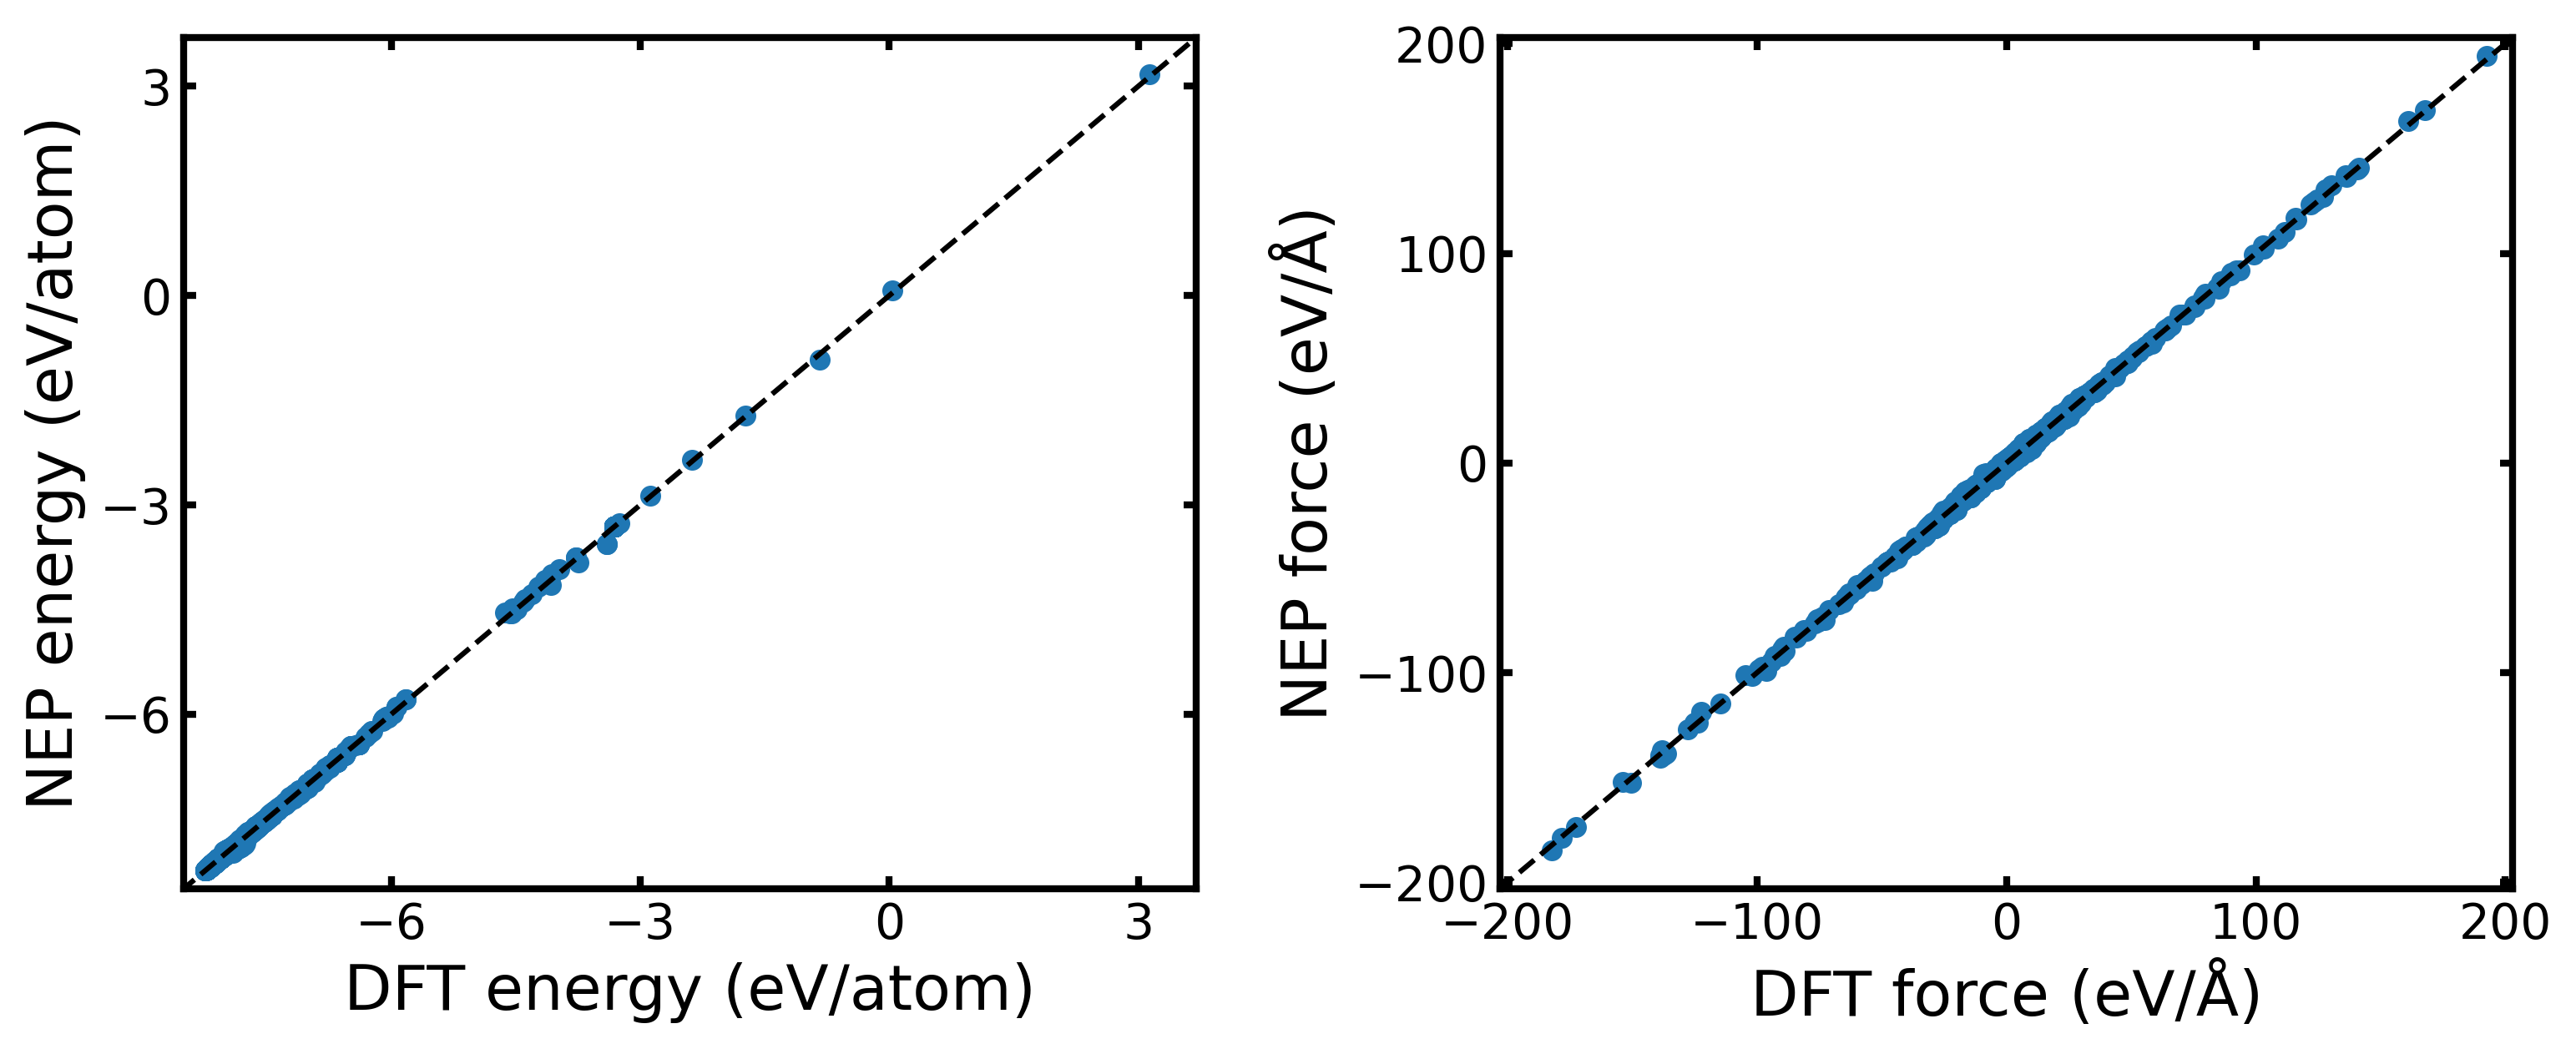

In [89]:
%matplotlib inline
from wizard.io import read_xyz
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt 
import numpy as np

# 计算性质
calc = CPUNEP('nep.txt')
frames = read_xyz('Fe.xyz')

def plot_force_results(frames, calcs, labels = None, e_val = [None, None], f_val = [None, None]):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)
    plt.rcParams.update({"font.size": 14, "text.usetex": False})
    plt.subplots_adjust(wspace=0.3, bottom=0.2)
    cmap = plt.get_cmap("tab10")
  
    print(len(frames))  

    label_colors = {}
    if labels is None:
        labels = [str(i) for i in range(len(calcs))]
    for calc, label in zip(calcs, labels):
        e_1, e_2, f_1, f_2 = [], [], [], []
        for atoms in frames:
            atoms.calc = calc
            e_1.append(atoms.get_potential_energy() / len(atoms))
            e_2.append(atoms.info['energy'] / len(atoms))
            f_1.append(atoms.get_forces())
            f_2.append(atoms.info['forces'])
        e_1 = np.array(e_1)
        e_2 = np.array(e_2)
        f_1 = np.concatenate(f_1)
        f_2 = np.concatenate(f_2)
        color = cmap(labels.index(label))
        axes[0].plot(e_2, e_1, ".", markersize=10, label=label, color=color)
        axes[1].plot(f_2, f_1, ".", markersize=10, label=label, color=color)
        if label not in label_colors:
            label_colors[label] = color
        e_rmse = np.sqrt(np.mean((e_1-e_2)**2)) 
        f_rmse = np.sqrt(np.mean((f_1-f_2)**2))
        print(f'{label}_E_rmse: {e_rmse * 1000:.2f} meV/atom')
        print(f'{label}_F_rmse: {f_rmse * 1000:.2f} meV/Å')

    x_min, x_max = axes[0].get_xlim()
    y_min, y_max = axes[0].get_ylim()
    min_val = min(x_min, y_min)
    max_val = max(x_max, y_max)
    axes[0].plot([min_val, max_val], [min_val, max_val], 'k--')

    x_min, x_max = axes[1].get_xlim()
    y_min, y_max = axes[1].get_ylim()
    min_val = min(x_min, y_min)
    max_val = max(x_max, y_max)
    axes[1].plot([min_val, max_val], [min_val, max_val], 'k--')

    if e_val[0] is not None and e_val[1] is not None:
        axes[0].set_xlim(e_val)
        axes[0].tick_params(which='major', direction='in', top=True, right=True)
        axes[0].xaxis.set_major_locator(MultipleLocator(3))
        axes[0].set_ylim(e_val)
        axes[0].yaxis.set_major_locator(MultipleLocator(3))
    if f_val[0] is not None and f_val[1] is not None:
        axes[1].set_xlim(f_val)
        axes[1].tick_params(which='major', direction='in', top=True, right=True)
        axes[1].xaxis.set_major_locator(MultipleLocator(100))
        axes[1].tick_params(which='major', direction='in', top=True, right=True)
        axes[1].set_ylim(f_val)
        axes[1].yaxis.set_major_locator(MultipleLocator(100))

    axes[0].set_xlabel("DFT energy (eV/atom)",fontsize=18)
    axes[0].set_ylabel("NEP energy (eV/atom)",fontsize=18)
    axes[1].set_xlabel("DFT force (eV/Å)",fontsize=18)
    axes[1].set_ylabel("NEP force (eV/Å)",fontsize=18)
    [spine.set_linewidth(2) for spine in axes[0].spines.values()]; axes[0].tick_params(width=2)
    [spine.set_linewidth(2) for spine in axes[1].spines.values()]; axes[1].tick_params(width=2)
    # plt.tight_layout()
    # axes[0].text(0.05, 0.95, '(a)', transform=axes[0].transAxes, verticalalignment='top')
    # axes[1].text(0.05, 0.95, '(b)', transform=axes[1].transAxes, verticalalignment='top')

    # handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='') for label, color in label_colors.items()]
    # plt.legend(handles, label_colors.keys())
    plt.savefig("force_results.png")
    plt.show()
    plt.close()

plot_force_results(frames, [calc],None,(-8.5,3.7),(-203,203))

## 性质计算

晶格常数与结合能

In [54]:
from wizard.atoms import SymbolInfo
from wizard.calculator import MaterialCalculator

symbol_info = SymbolInfo('Fe', 'bcc', 2.83)
atoms = symbol_info.create_bulk_atoms((1,1,1))
material_calculator = MaterialCalculator(atoms, calc, symbol_info)
material_calculator.lattice_constant()

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 15:58:24      -16.471471        0.0987
BFGSLineSearch:    1[  2] 15:58:24      -16.471675        0.0001


(-8.235837301096822,
 array([ 2.83389891,  2.83389891,  2.83389891, 90.        , 90.        ,
        90.        ]))

弹性模量

In [55]:
from wizard.atoms import SymbolInfo
from wizard.calculator import MaterialCalculator

symbol_info = SymbolInfo('Fe', 'bcc', 2.83)
atoms = symbol_info.create_bulk_atoms()
material_calculator = MaterialCalculator(atoms, calc, symbol_info)
material_calculator.elastic_constant()

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 15:58:29     -444.729728        2.6658
BFGSLineSearch:    1[  2] 15:58:29     -444.735100        0.3819


BFGSLineSearch:    2[  3] 15:58:29     -444.735214        0.0026


array([[ 2.57640781e+02,  1.22197377e+02,  1.22197377e+02,
        -7.41025334e-09, -3.70533972e-09,  7.41085729e-09],
       [ 1.22197377e+02,  2.57640781e+02,  1.22197377e+02,
        -5.37257067e-14,  5.65046226e-14, -2.02629282e-14],
       [ 1.22197377e+02,  1.22197377e+02,  2.57640781e+02,
         6.29887596e-14,  1.48209309e-08, -1.27366977e-15],
       [-7.41035709e-09,  1.80629531e-14,  4.63152644e-14,
         1.00289055e+02,  1.48208828e-08,  2.93263341e-15],
       [-3.70523001e-09,  4.12205853e-14,  1.48209383e-08,
         1.48209522e-08,  1.00289055e+02,  7.41050344e-09],
       [ 7.41081283e-09, -4.63152644e-16,  4.64310526e-14,
        -3.95676217e-15,  7.41036264e-09,  1.00289055e+02]])

能量体积曲线

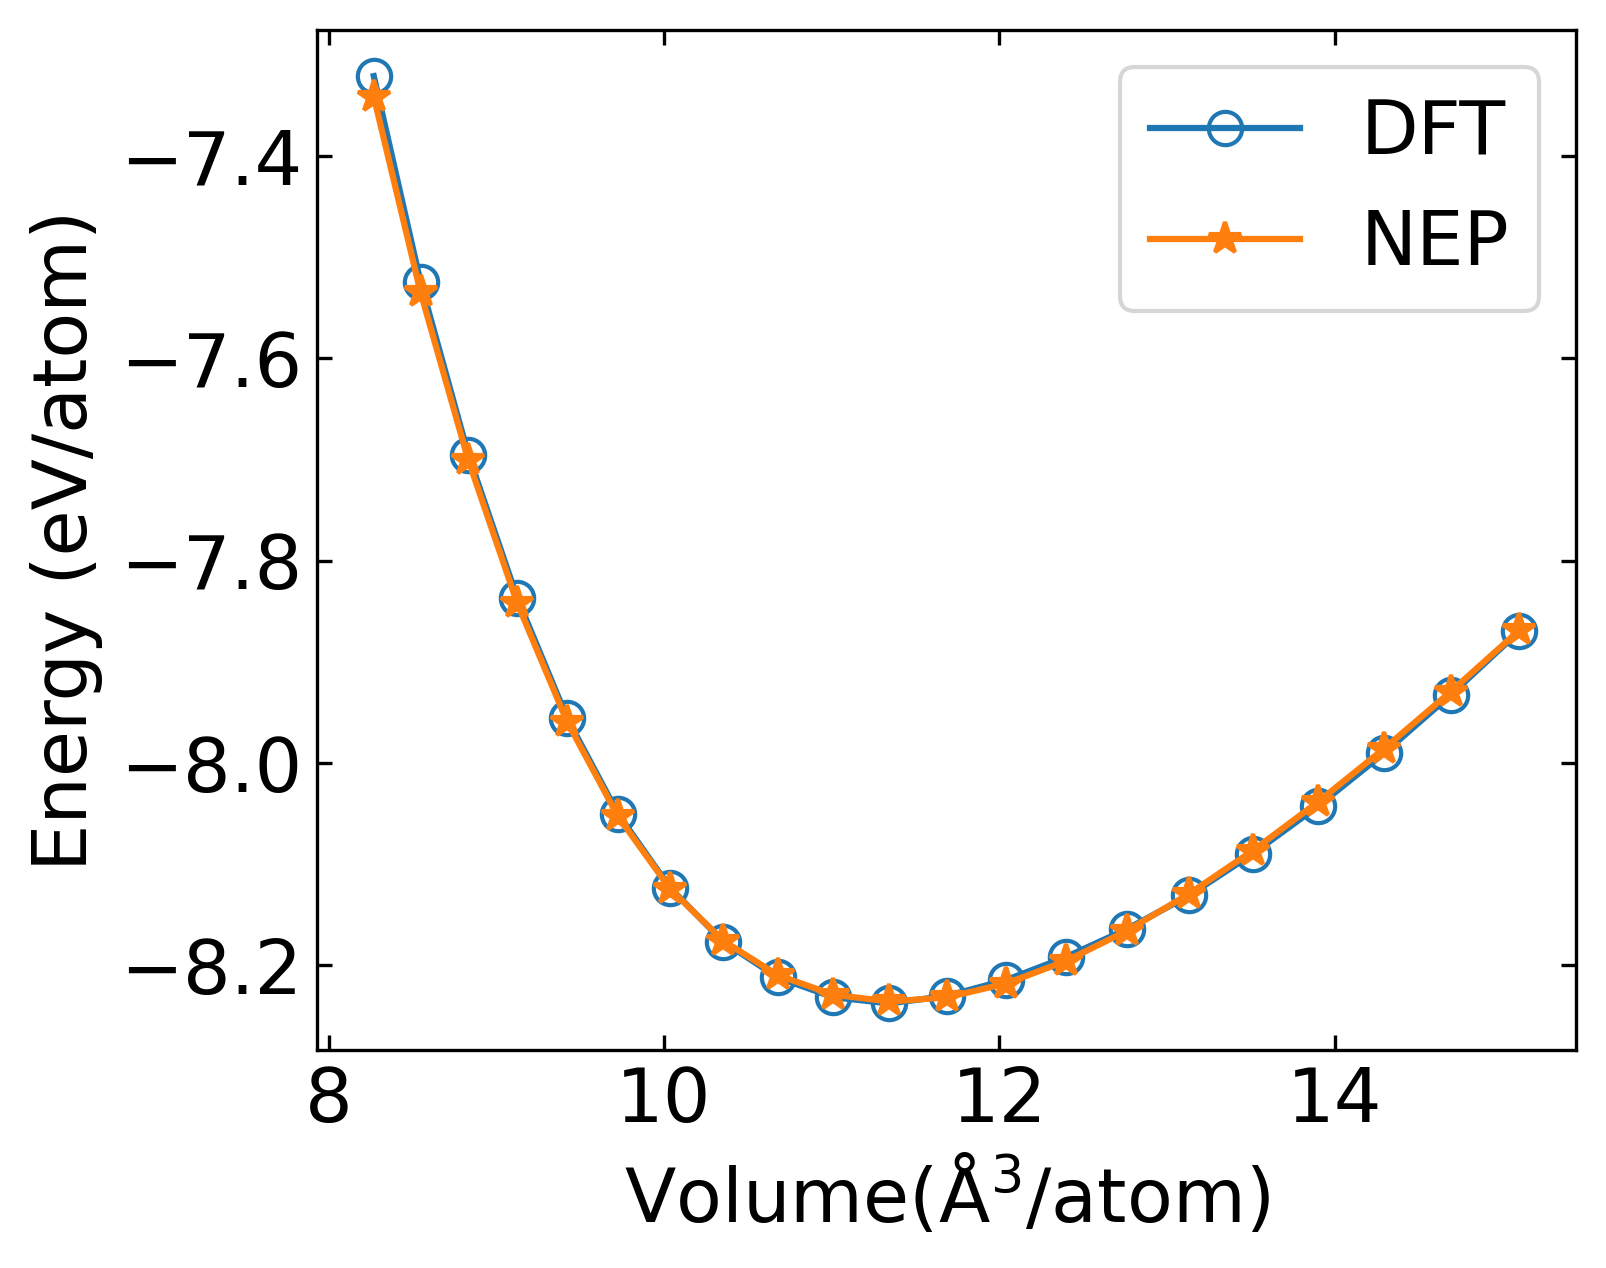

In [93]:
%matplotlib inline
from wizard.io import read_xyz
import matplotlib.pyplot as plt 

volumes, dft, nep = [], [], []

frames = read_xyz('xyz/eos.xyz')
for atoms in frames:
    volumes.append(atoms.get_volume() / len(atoms))
    dft.append(atoms.info['energy'] / len(atoms))
    atoms.calc = calc
    nep.append(atoms.get_potential_energy() / len(atoms))

data = sorted(zip(volumes, dft, nep))
volumes, dft, nep = zip(*data)

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

ax.plot(volumes, dft, '-o', label = 'DFT',fillstyle='none', markersize = 8, color='#1f77b4') 
ax.plot(volumes, nep, '-*', label = 'NEP', markersize = 8, color='#ff7f0e')  

ax.set_xlabel('Volume(Å$^3$/atom)')
ax.set_ylabel('Energy (eV/atom)')
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('eos_curve.png')

短程排斥

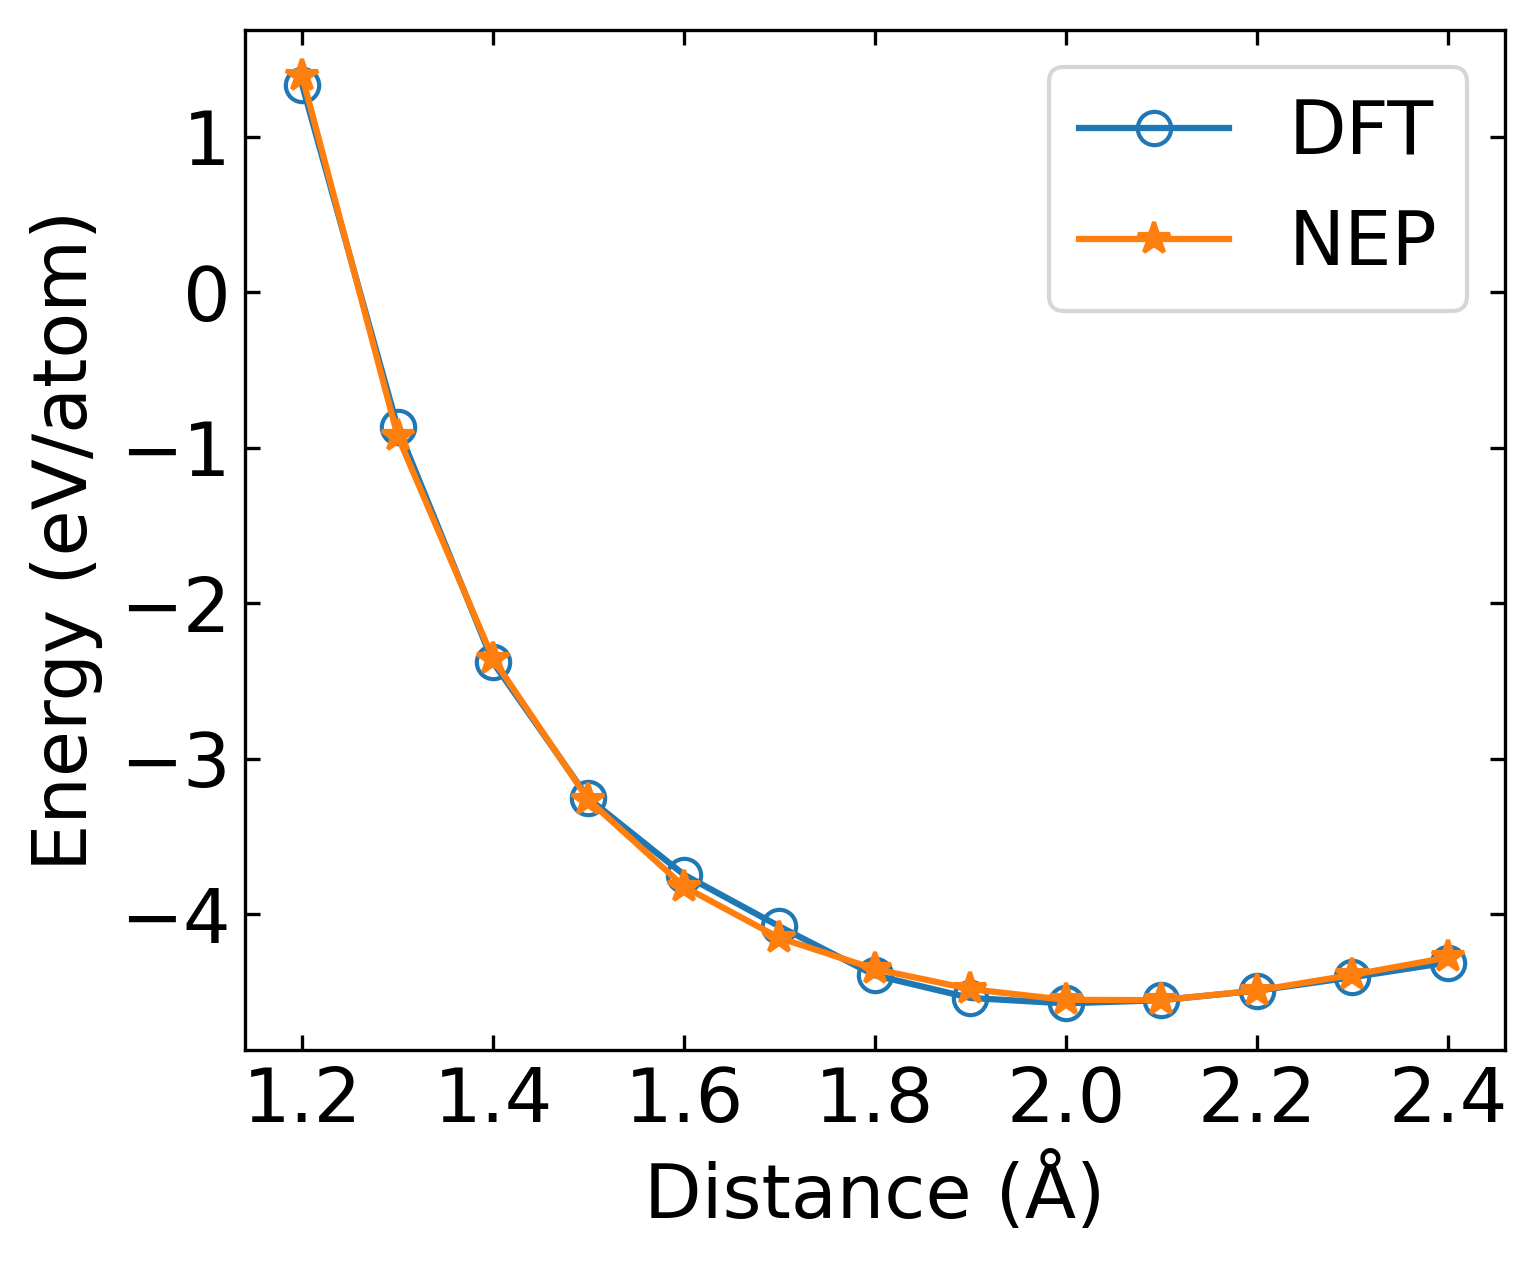

In [57]:
%matplotlib inline
from wizard.io import read_xyz
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator
distances, dft, nep = [], [], []

frames = read_xyz('xyz/dimer.xyz')
for atoms in frames:
    distances.append(atoms.get_distance(0, 1))
    dft.append(atoms.info['energy'] / len(atoms))
    atoms.calc = calc
    nep.append(atoms.get_potential_energy() / len(atoms))

data = sorted(zip(distances, dft, nep))
distances, dft, nep = zip(*data)

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.tick_params(which='major', direction='in', top=True, right=True)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.plot(distances, dft, '-o', label = 'DFT',fillstyle='none', markersize = 8, color='#1f77b4') 
ax.plot(distances, nep, '-*', label = 'NEP', markersize = 8, color='#ff7f0e')  

ax.set_xlabel('Distance (Å)')
ax.set_ylabel('Energy (eV/atom)')
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('dimer.png')

声子谱

In [35]:
from wizard.atoms import SymbolInfo
from wizard.calculator import MaterialCalculator
%matplotlib inline

symbol_info = SymbolInfo('Fe', 'bcc', 2.83)
atoms = symbol_info.create_bulk_atoms()
material_calculator = MaterialCalculator(atoms, calc, symbol_info)
material_calculator.phonon_dispersion()

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 15:04:29     -444.729728        2.6658
BFGSLineSearch:    1[  2] 15:04:29     -444.735100        0.3819
BFGSLineSearch:    2[  3] 15:04:29     -444.735214        0.0026
Calculating force constants...


点缺陷形成能

In [58]:
from wizard.atoms import SymbolInfo
from wizard.calculator import MaterialCalculator

symbol_info = SymbolInfo('Fe', 'bcc', 2.83)
sia_vectors = [(1/2,1/2,1/2),(1,0,0),(1,1,0)]
atoms = symbol_info.create_bulk_atoms((3,4,5))
material_calculator = MaterialCalculator(atoms, calc, symbol_info)
material_calculator.formation_energy_vacancy()
material_calculator.migration_energy_vacancy()
for nth in range(1, 6):
    material_calculator.formation_energy_divacancies(nth)
for vector in sia_vectors:
    material_calculator.formation_energy_sia(vector)
material_calculator.formation_energy_interstitial_atom(symbol_info.formula,[0,0,1/2],'octahedral')
material_calculator.formation_energy_interstitial_atom(symbol_info.formula,[1/4,0,1/2],'tetrahedral')

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:01:04     -988.288284        5.9239


BFGSLineSearch:    1[  2] 16:01:04     -988.300223        0.8487
BFGSLineSearch:    2[  3] 16:01:04     -988.300476        0.0057
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:01:04     -977.882205        2.2670
BFGSLineSearch:    1[  2] 16:01:04     -977.884175        0.5769
BFGSLineSearch:    2[  3] 16:01:04     -977.977716        0.1122
BFGSLineSearch:    3[  4] 16:01:04     -977.997842        0.3200
BFGSLineSearch:    4[  5] 16:01:04     -978.000419        0.0279
BFGSLineSearch:    5[  6] 16:01:04     -978.001254        0.0899
BFGSLineSearch:    6[  7] 16:01:04     -978.001446        0.0196
BFGSLineSearch:    7[  8] 16:01:04     -978.001476        0.0117
BFGSLineSearch:    8[  9] 16:01:04     -978.001484        0.0054
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:01:04     -977.882205        2.2670
BFGSLineSearch:    1[  2] 16:01:04     -977.884175        0.5769
BFGSLineSearch:    2[  3]

4.680403581530065

DFT 空位迁移能

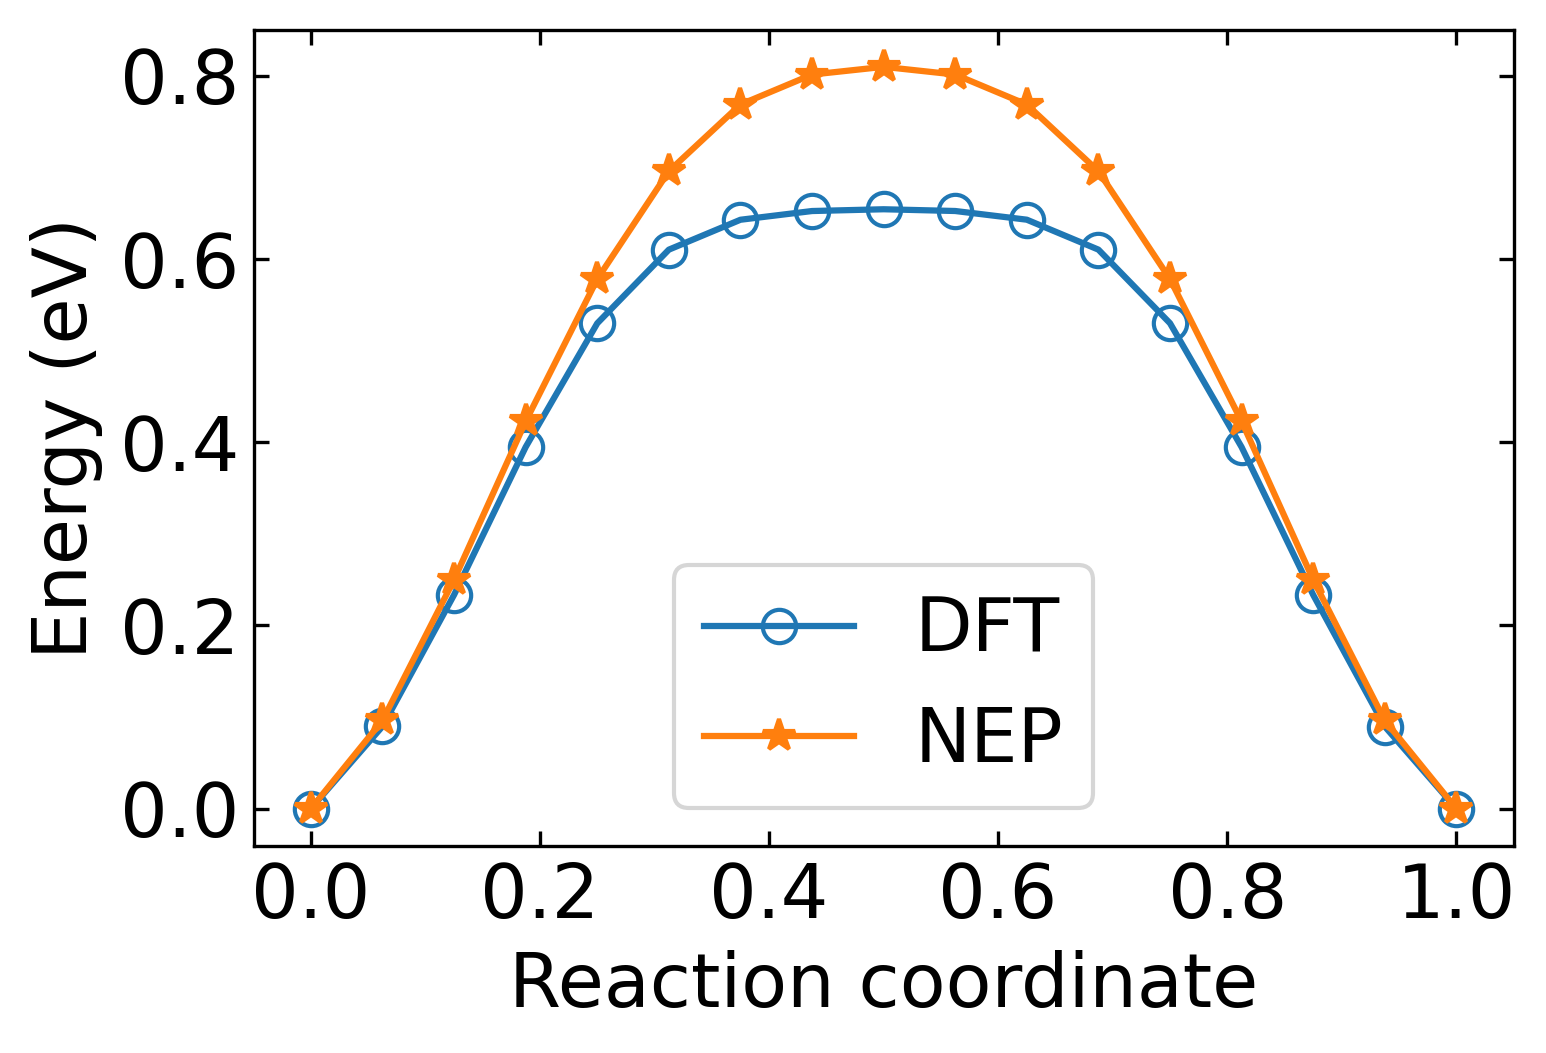

In [60]:
%matplotlib inline
from wizard.io import read_xyz,relax
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator

frames = read_xyz('xyz/Vacmig.xyz')

Emig_dft, Emig_nep = [], []
for atoms in frames:
    Emig_dft.append(atoms.info['energy'])
    atoms.calc = calc
    Emig_nep.append(atoms.get_potential_energy())

Emig_dft = np.array(Emig_dft) - min(Emig_dft)
Emig_nep = np.array(Emig_nep) - min(Emig_nep)

# symbol_info = SymbolInfo('Fe', 'bcc', 2.83)
# atoms = symbol_info.create_bulk_atoms((3,4,5))
# material_calculator = MaterialCalculator(atoms, calc, symbol_info)
# Emig_nep = material_calculator.migration_energy_vacancy()

migration_energy_DFT = max(Emig_dft)-min(Emig_dft)
migration_energy_NEP = max(Emig_nep)-min(Emig_nep)

with open('MaterialProperties.out', 'a') as f:
    f.write(f' monoVacEmig_DFTconf: DFT={migration_energy_DFT:.4f} eV, NEP= {migration_energy_NEP:.4f} eV\n')
    # f.write(f' monoVacEmig_ASENEB: DFT={migration_energy_DFT:.4f} eV, NEP= {migration_energy_NEP:.4f} eV\n')

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

x_dft = np.linspace(0, 1, len(Emig_dft))
x_nep = np.linspace(0, 1, len(Emig_nep))

ax.plot(x_dft, Emig_dft, '-o', label = 'DFT', fillstyle='none', markersize = 8, color='#1f77b4')
ax.plot(x_nep, Emig_nep, '-*', label = 'NEP', markersize = 8, color='#ff7f0e')

ax.set_xticks(np.arange(0, 1.02, 0.2))  # 设置x轴的刻度
ax.set_xlabel('Reaction coordinate')
ax.set_ylabel('Energy (eV)')
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('Emig.png')

DFT SIA形成能

In [85]:
from wizard.atoms import SymbolInfo
from wizard.calculator import MaterialCalculator
from wizard.io import read_xyz
import numpy as np

frames = read_xyz('xyz/SIAs.xyz')
bulk = read_xyz('xyz/bulk.xyz')

coh = bulk[-1]
coh_dft = coh.info['energy'] / len(coh)
coh.calc = calc
coh_nep = coh.get_potential_energy() / len(coh)

dft, nep = [], []
# dft = []
for atoms in frames:
    dft.append(atoms.info['energy'] - coh_dft * len(atoms))
    atoms.calc = calc
    nep.append(atoms.get_potential_energy() - coh_nep * len(atoms))

# nep = []
# symbol_info = SymbolInfo('Fe', 'bcc', 2.83)
# sia_vectors = [(1,1,0),(1/2,1/2,1/2),(1,0,0)]
# atoms = symbol_info.create_bulk_atoms((3,4,5))
# material_calculator = MaterialCalculator(atoms, calc, symbol_info)
# for vector in sia_vectors:
#     nep.append(material_calculator.formation_energy_sia(vector))
# nep.append(material_calculator.formation_energy_interstitial_atom(symbol_info.formula,[0,0,1/2],'octahedral'))
# nep.append(material_calculator.formation_energy_interstitial_atom(symbol_info.formula,[1/4,0,1/2],'tetrahedral'))

with open('MaterialProperties.out', 'a') as f:
    f.write(f' 110SIA_DFTconf: DFT={dft[0]:.4f} eV, NEP={nep[0]:.4f} eV\n')
    f.write(f' 111SIA_DFTconf: DFT={dft[1]:.4f} eV, NEP={nep[1]:.4f} eV\n')
    f.write(f' 100SIA_DFTconf: DFT={dft[2]:.4f} eV, NEP={nep[2]:.4f} eV\n')
    f.write(f' OISSIA_DFTconf: DFT={dft[3]:.4f} eV, NEP={nep[3]:.4f} eV\n')
    f.write(f' TISSIA_DFTconf: DFT={dft[4]:.4f} eV, NEP={nep[4]:.4f} eV\n')

DFT 单空位形成能和1-5NN双空位结合能

In [63]:
from wizard.io import read_xyz

divac = read_xyz('xyz/diVac.xyz')
mono = read_xyz('xyz/Vac1.xyz')
bulk = read_xyz('xyz/bulk.xyz')

coh = bulk[-1]
coh_dft = coh.info['energy'] / len(coh)
coh.calc = calc
relax(coh)
coh_nep = coh.get_potential_energy() / len(coh)

mono = mono[-1]
mono_dft = mono.info['energy'] - coh_dft * len(mono)
# mono.calc = calc
# mono_nep = mono.get_potential_energy() - coh_nep * len(mono)

symbol_info = SymbolInfo('Fe', 'bcc', 2.83)
atoms = symbol_info.create_bulk_atoms((3,4,5))
material_calculator = MaterialCalculator(atoms, calc, symbol_info)
mono_nep = material_calculator.formation_energy_vacancy()

with open('MaterialProperties.out', 'a') as f:
    # f.write(f' monoVacEf_DFTconf: DFT={mono_dft:.4f} eV, NEP={mono_nep:.4f} eV\n')
    f.write(f' monoVacEf_ASE: DFT={mono_dft:.4f} eV, NEP={mono_nep:.4f} eV\n')

dft, nep = [], []
for atoms in divac:
    dft.append(2 * mono_dft - (atoms.info['energy'] - coh_dft * len(atoms)))
    # atoms.calc = calc
    # nep.append(2 * mono_nep - (atoms.get_potential_energy() - coh_nep * len(atoms)))

for nth in range(1, 6):
    Ef = material_calculator.formation_energy_divacancies(nth)
    nep.append(2 * mono_nep - Ef)

# with open('MaterialProperties.out', 'a') as f:
#     f.write(f' diVac_DFTconf 1NN: DFT={dft[0]:.4f} eV, NEP={nep[0]:.4f} eV\n')
#     f.write(f' diVac_DFTconf 2NN: DFT={dft[1]:.4f} eV, NEP={nep[1]:.4f} eV\n')
#     f.write(f' diVac_DFTconf 3NN: DFT={dft[2]:.4f} eV, NEP={nep[2]:.4f} eV\n')
#     f.write(f' diVac_DFTconf 4NN: DFT={dft[3]:.4f} eV, NEP={nep[3]:.4f} eV\n')
with open('MaterialProperties.out', 'a') as f:
    f.write(f' diVac_ASE 1NN: DFT={dft[0]:.4f} eV, NEP={nep[0]:.4f} eV\n')
    f.write(f' diVac_ASE 2NN: DFT={dft[1]:.4f} eV, NEP={nep[1]:.4f} eV\n')
    f.write(f' diVac_ASE 3NN: DFT={dft[2]:.4f} eV, NEP={nep[2]:.4f} eV\n')
    f.write(f' diVac_ASE 4NN: DFT={dft[3]:.4f} eV, NEP={nep[3]:.4f} eV\n')

                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:29:16    -2058.944750        9.3387


BFGSLineSearch:    1[  2] 16:29:16    -2058.959023        1.3390
BFGSLineSearch:    2[  3] 16:29:16    -2058.959325        0.0068
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:29:16     -988.288284        5.9239
BFGSLineSearch:    1[  2] 16:29:16     -988.300223        0.8487
BFGSLineSearch:    2[  3] 16:29:16     -988.300476        0.0057
                Step[ FC]     Time          Energy          fmax
BFGSLineSearch:    0[  0] 16:29:16     -977.882205        2.2670
BFGSLineSearch:    1[  2] 16:29:16     -977.884175        0.5769
BFGSLineSearch:    2[  3] 16:29:16     -977.977716        0.1122
BFGSLineSearch:    3[  4] 16:29:16     -977.997842        0.3200
BFGSLineSearch:    4[  5] 16:29:16     -978.000419        0.0279
BFGSLineSearch:    5[  6] 16:29:17     -978.001254        0.0899
BFGSLineSearch:    6[  7] 16:29:17     -978.001446        0.0196
BFGSLineSearch:    7[  8] 16:29:17     -978.001476        0.0117
BFGSLineSearch:    8[  9]

间隙团簇形成能-100

In [1]:
from wizard.atoms import SymbolInfo, Morph
from wizard.io import read_xyz, dump_xyz
import numpy as np
import os
import shutil

file_names = ["sia_cluster_100.xyz","cluster_100.txt"]
for file_name in file_names:
    if os.path.exists(file_name):
        os.remove(file_name)

PATH = 'sia_cluster_100'
if os.path.exists(PATH):
    shutil.rmtree(PATH)

num_cluster = []
formation_energies = []
for Rcut in np.arange(3, 20, 0.5):
    burger = (1, 0, 0)
    thickness = 2
    atoms = SymbolInfo('Fe', 'bcc', 2.83).create_bulk_atoms(supercell=(30, 30, 30))
    coh = -8.2358
    center = atoms.get_center_of_mass()
    for atom in atoms:
        vector = atom.position - center
        proj = abs(vector @ burger) / np.linalg.norm(burger)
        R = np.sqrt(max(np.dot(vector, vector) - np.dot(proj, proj), 0))
        if  R < Rcut and proj < thickness:
            Morph(atoms).create_self_interstitial_atom(burger, index = atom.index)
    Morph(atoms).gpumd(f'sia_cluster_100/{Rcut}',['potential nep.txt', 'ensemble nve', 'time_step 0',
                                    'minimize fire 1.0e-4 1000','dump_exyz 1','run 1'])
    frames = read_xyz(f'sia_cluster_100/{Rcut}/dump.xyz')
    atoms = frames[-1]
    dump_xyz('sia_cluster_100.xyz', atoms)
    num_cluster.append(len(atoms) - 54000)
    formation_energies.append(atoms.info['energy'] -  coh * len(atoms))
np.savetxt('cluster_100.txt', np.column_stack((num_cluster, formation_energies)), fmt='%f')


***************************************************************
*                 Welcome to use GPUMD                        *
*     (Graphics Processing Units Molecular Dynamics)          *
*                    Version 3.9.1                            *
*              This is the gpumd executable                   *
***************************************************************


---------------------------------------------------------------
Compiling options:
---------------------------------------------------------------

DEBUG is off: Use different PRNG seeds for different runs.

---------------------------------------------------------------
GPU information:
---------------------------------------------------------------

number of GPUs = 1
Device id:                   0
    Device name:             NVIDIA GeForce RTX 4090
    Compute capability:      8.9
    Amount of global memory: 23.4317 GB
    Number of SMs:           128

-------------------------------------------------

间隙团簇形成能-111

In [2]:
from wizard.atoms import SymbolInfo, Morph
from wizard.io import read_xyz, dump_xyz
import numpy as np
import os
import shutil

file_names = ["sia_cluster_111.xyz","cluster_111.txt"]
for file_name in file_names:
    if os.path.exists(file_name):
        os.remove(file_name)

PATH = 'sia_cluster_111'
if os.path.exists(PATH):
    shutil.rmtree(PATH)

num_cluster = []
formation_energies = []
for Rcut in np.arange(3, 19, 0.5):
    burger = (1, -1, 0)
    thickness = 2
    atoms = SymbolInfo('Fe', 'bcc', 2.83).create_bulk_atoms(supercell=(30, 30, 30))
    coh = -8.2358
    center = atoms.get_center_of_mass()
    for atom in atoms:
        vector = atom.position - center
        proj = abs(vector @ burger) / np.linalg.norm(burger)
        R = np.sqrt(max(np.dot(vector, vector) - np.dot(proj, proj), 0))
        if  R < Rcut and proj < thickness:
            Morph(atoms).create_self_interstitial_atom(burger, index = atom.index)
    Morph(atoms).gpumd(f'sia_cluster_111/{Rcut}',['potential nep.txt', 'ensemble nve', 'time_step 0',
                                    'minimize fire 1.0e-4 1000','dump_exyz 1','run 1'])
    frames = read_xyz(f'sia_cluster_111/{Rcut}/dump.xyz')
    atoms = frames[-1]
    dump_xyz('sia_cluster_111.xyz', atoms)
    num_cluster.append(len(atoms) - 54000)
    formation_energies.append(atoms.info['energy'] -  coh * len(atoms))
np.savetxt('cluster_111.txt', np.column_stack((num_cluster, formation_energies)), fmt='%f')


***************************************************************
*                 Welcome to use GPUMD                        *
*     (Graphics Processing Units Molecular Dynamics)          *
*                    Version 3.9.1                            *
*              This is the gpumd executable                   *
***************************************************************


---------------------------------------------------------------
Compiling options:
---------------------------------------------------------------

DEBUG is off: Use different PRNG seeds for different runs.

---------------------------------------------------------------
GPU information:
---------------------------------------------------------------

number of GPUs = 1
Device id:                   0
    Device name:             NVIDIA GeForce RTX 4090
    Compute capability:      8.9
    Amount of global memory: 23.4317 GB
    Number of SMs:           128

-------------------------------------------------

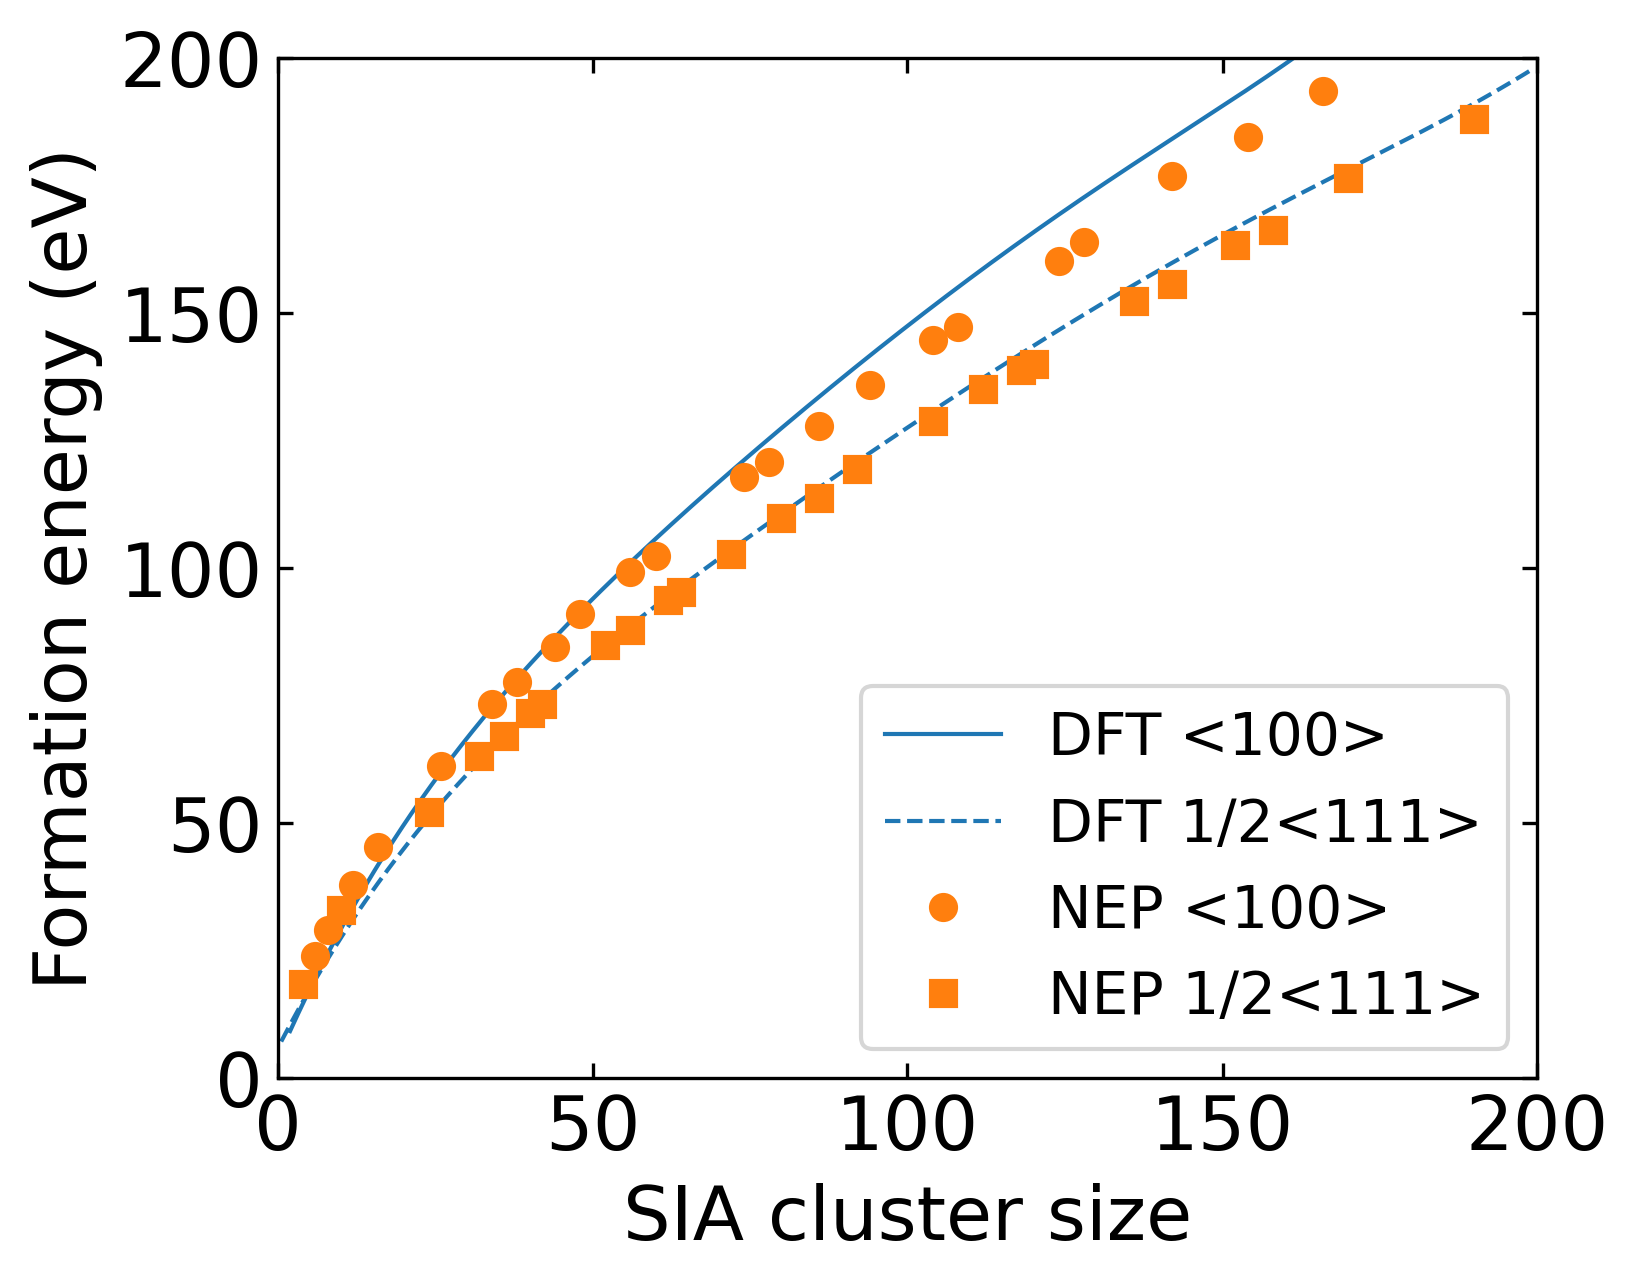

In [102]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义一个五次函数
def func(x,a,b,c,d,e,f):
    return a * np.power(x,5)+ b* np.power(x,4)+ c* np.power(x,3)+  d* np.power(x,2)+ e* np.power(x,1)+ f
# 读取数据
data_100dft = np.loadtxt('md_out/100SIAclustersdft.txt')
data_111dft = np.loadtxt('md_out/111SIAclustersdft.txt')

data_100x = data_100dft[:,0]
data_100y = data_100dft[:,1]
data_111x = data_111dft[:,0]
data_111y = data_111dft[:,1]

# 使用curve fit进行拟合
popt_100,pcov_100=curve_fit(func,data_100x,data_100y)
popt_111,pcov_111=curve_fit(func,data_111x,data_111y)
#生成更多的x值，使得插值更平滑
xnew_100x =np.linspace(data_100x.min(),data_100x.max(),1000)
xnew_111x =np.linspace(data_111x.min(),data_111x.max(),1000)
# 计算新的 y 值
ynew_100y = func(xnew_100x,*popt_100)
ynew_111y = func(xnew_111x,*popt_111)

nep_100 = np.loadtxt('md_out/cluster100nep.txt')
nep_111 = np.loadtxt('md_out/cluster111nep.txt')

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

ax.plot(xnew_100x,ynew_100y,'-',label='DFT <100>', linewidth = 1, color='#1f77b4')
ax.plot(xnew_111x,ynew_111y,'--',label='DFT 1/2<111>', linewidth = 1, color='#1f77b4')
ax.plot(nep_100[:,0],nep_100[:,1], 'o', label = 'NEP <100>', markersize = 6, color='#ff7f0e')
ax.plot(nep_111[:,0],nep_111[:,1], 's', label = 'NEP 1/2<111>', markersize = 6, color='#ff7f0e')

ax.set_xlim([0, 200])  # 例如，设置x轴显示从0到10
ax.set_ylim([0, 200])  # 例如，设置y轴显示从-1.5到1.5
ax.set_xlabel('SIA cluster size')
ax.set_ylabel('Formation energy (eV)')
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend(fontsize=14)
fig.savefig('sia_cluster.png')

空位团簇形成能

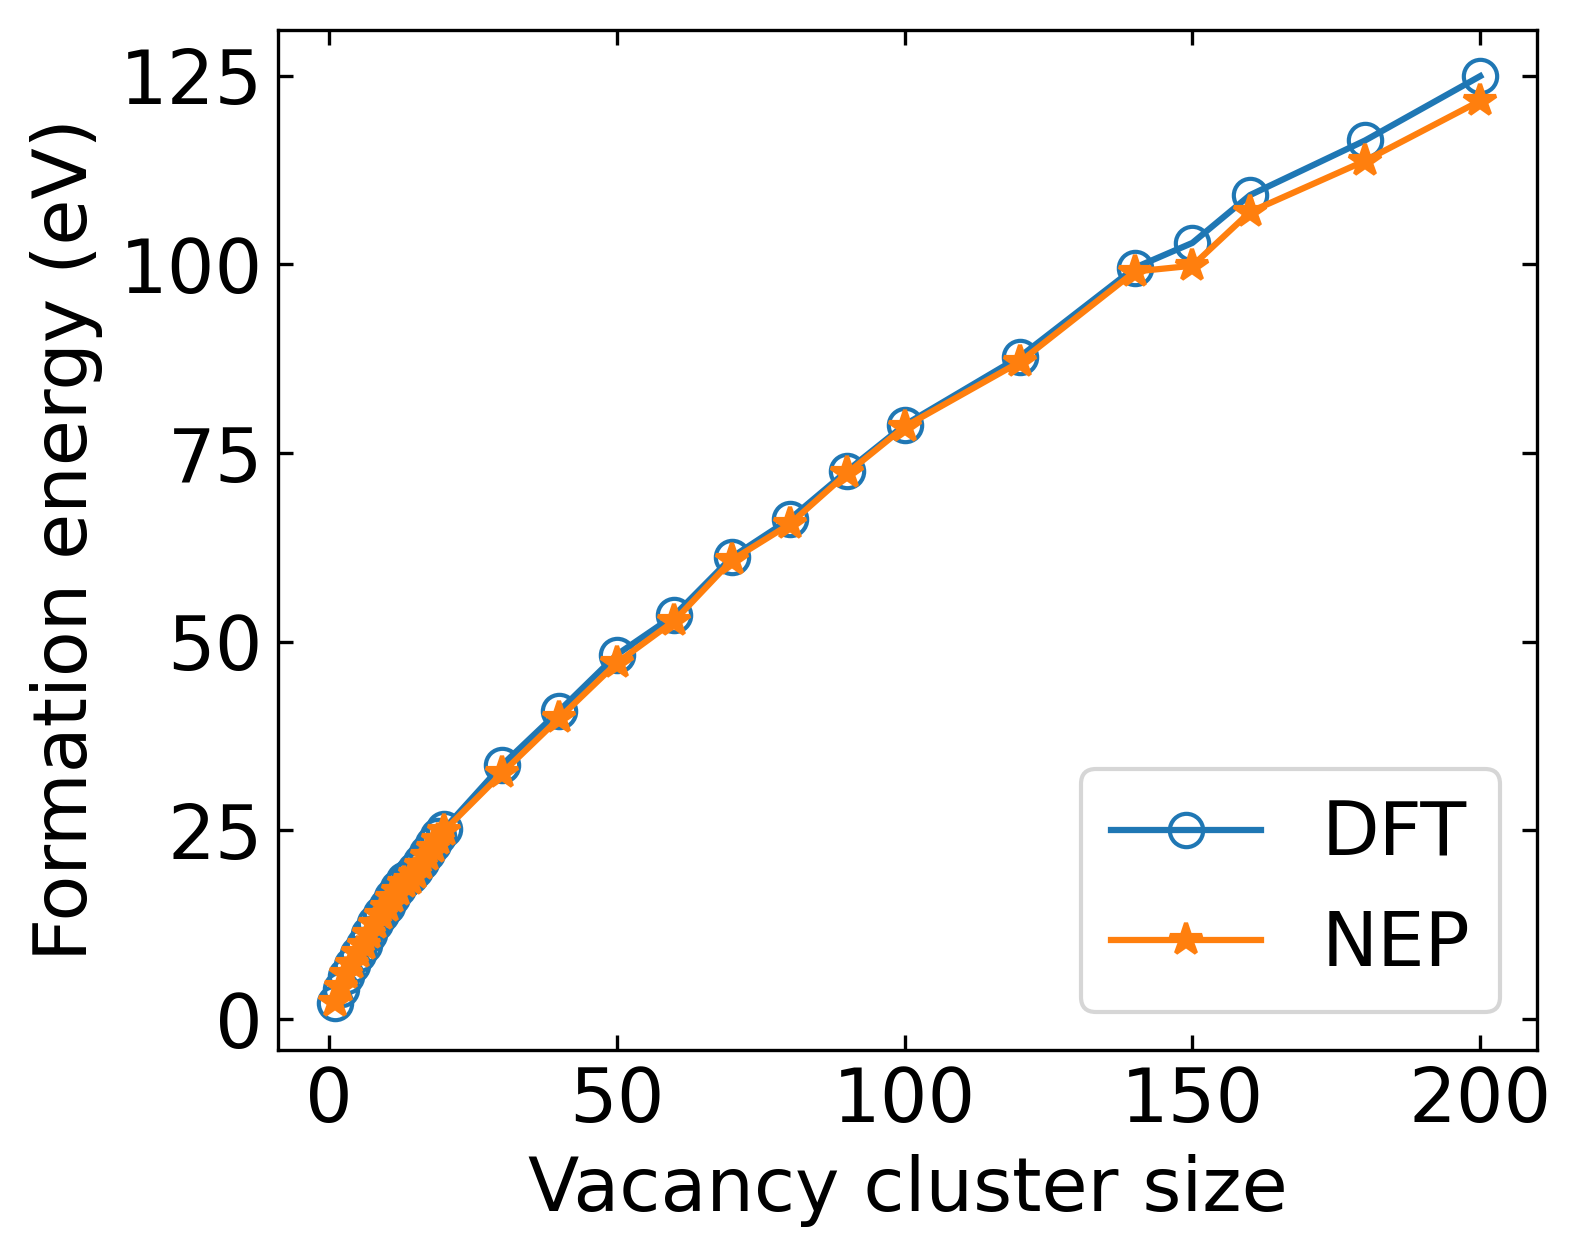

In [101]:
from wizard.io import read_xyz
import numpy as np
from matplotlib.ticker import MultipleLocator

bulk = read_xyz('xyz/bulk.xyz')

coh = bulk[-1]
coh_dft = coh.info['energy'] / len(coh)
coh.calc = calc
# relax(coh)
coh_nep = coh.get_potential_energy() / len(coh)

num_cluster = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 150, 160, 180, 200]
dft, nep = [], []

frames = read_xyz('xyz/Vaccluster.xyz')
for atoms in frames:
    dft.append(atoms.info['energy']  -  coh_dft * len(atoms))
    atoms.calc = calc
    # relax(atoms)
    nep.append(atoms.get_potential_energy()  -  coh_nep * len(atoms))

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})

# ax.set_xlim([0, 50])
# ax.set_ylim([0, 25])
# 显示上方和右侧的轴线和ticks
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.tick_params(which='major', direction='in', top=True, right=True)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(25))

ax.plot(num_cluster, nep, '-o', label = 'DFT', fillstyle='none', markersize = 8, color='#1f77b4')
ax.plot(num_cluster, dft, '-*', label = 'NEP', markersize = 8, color='#ff7f0e')
ax.set_xlabel('Vacancy cluster size')
ax.set_ylabel('Formation energy (eV)')
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend(loc='lower right')
fig.savefig('Vac_clusters.png')

表面能

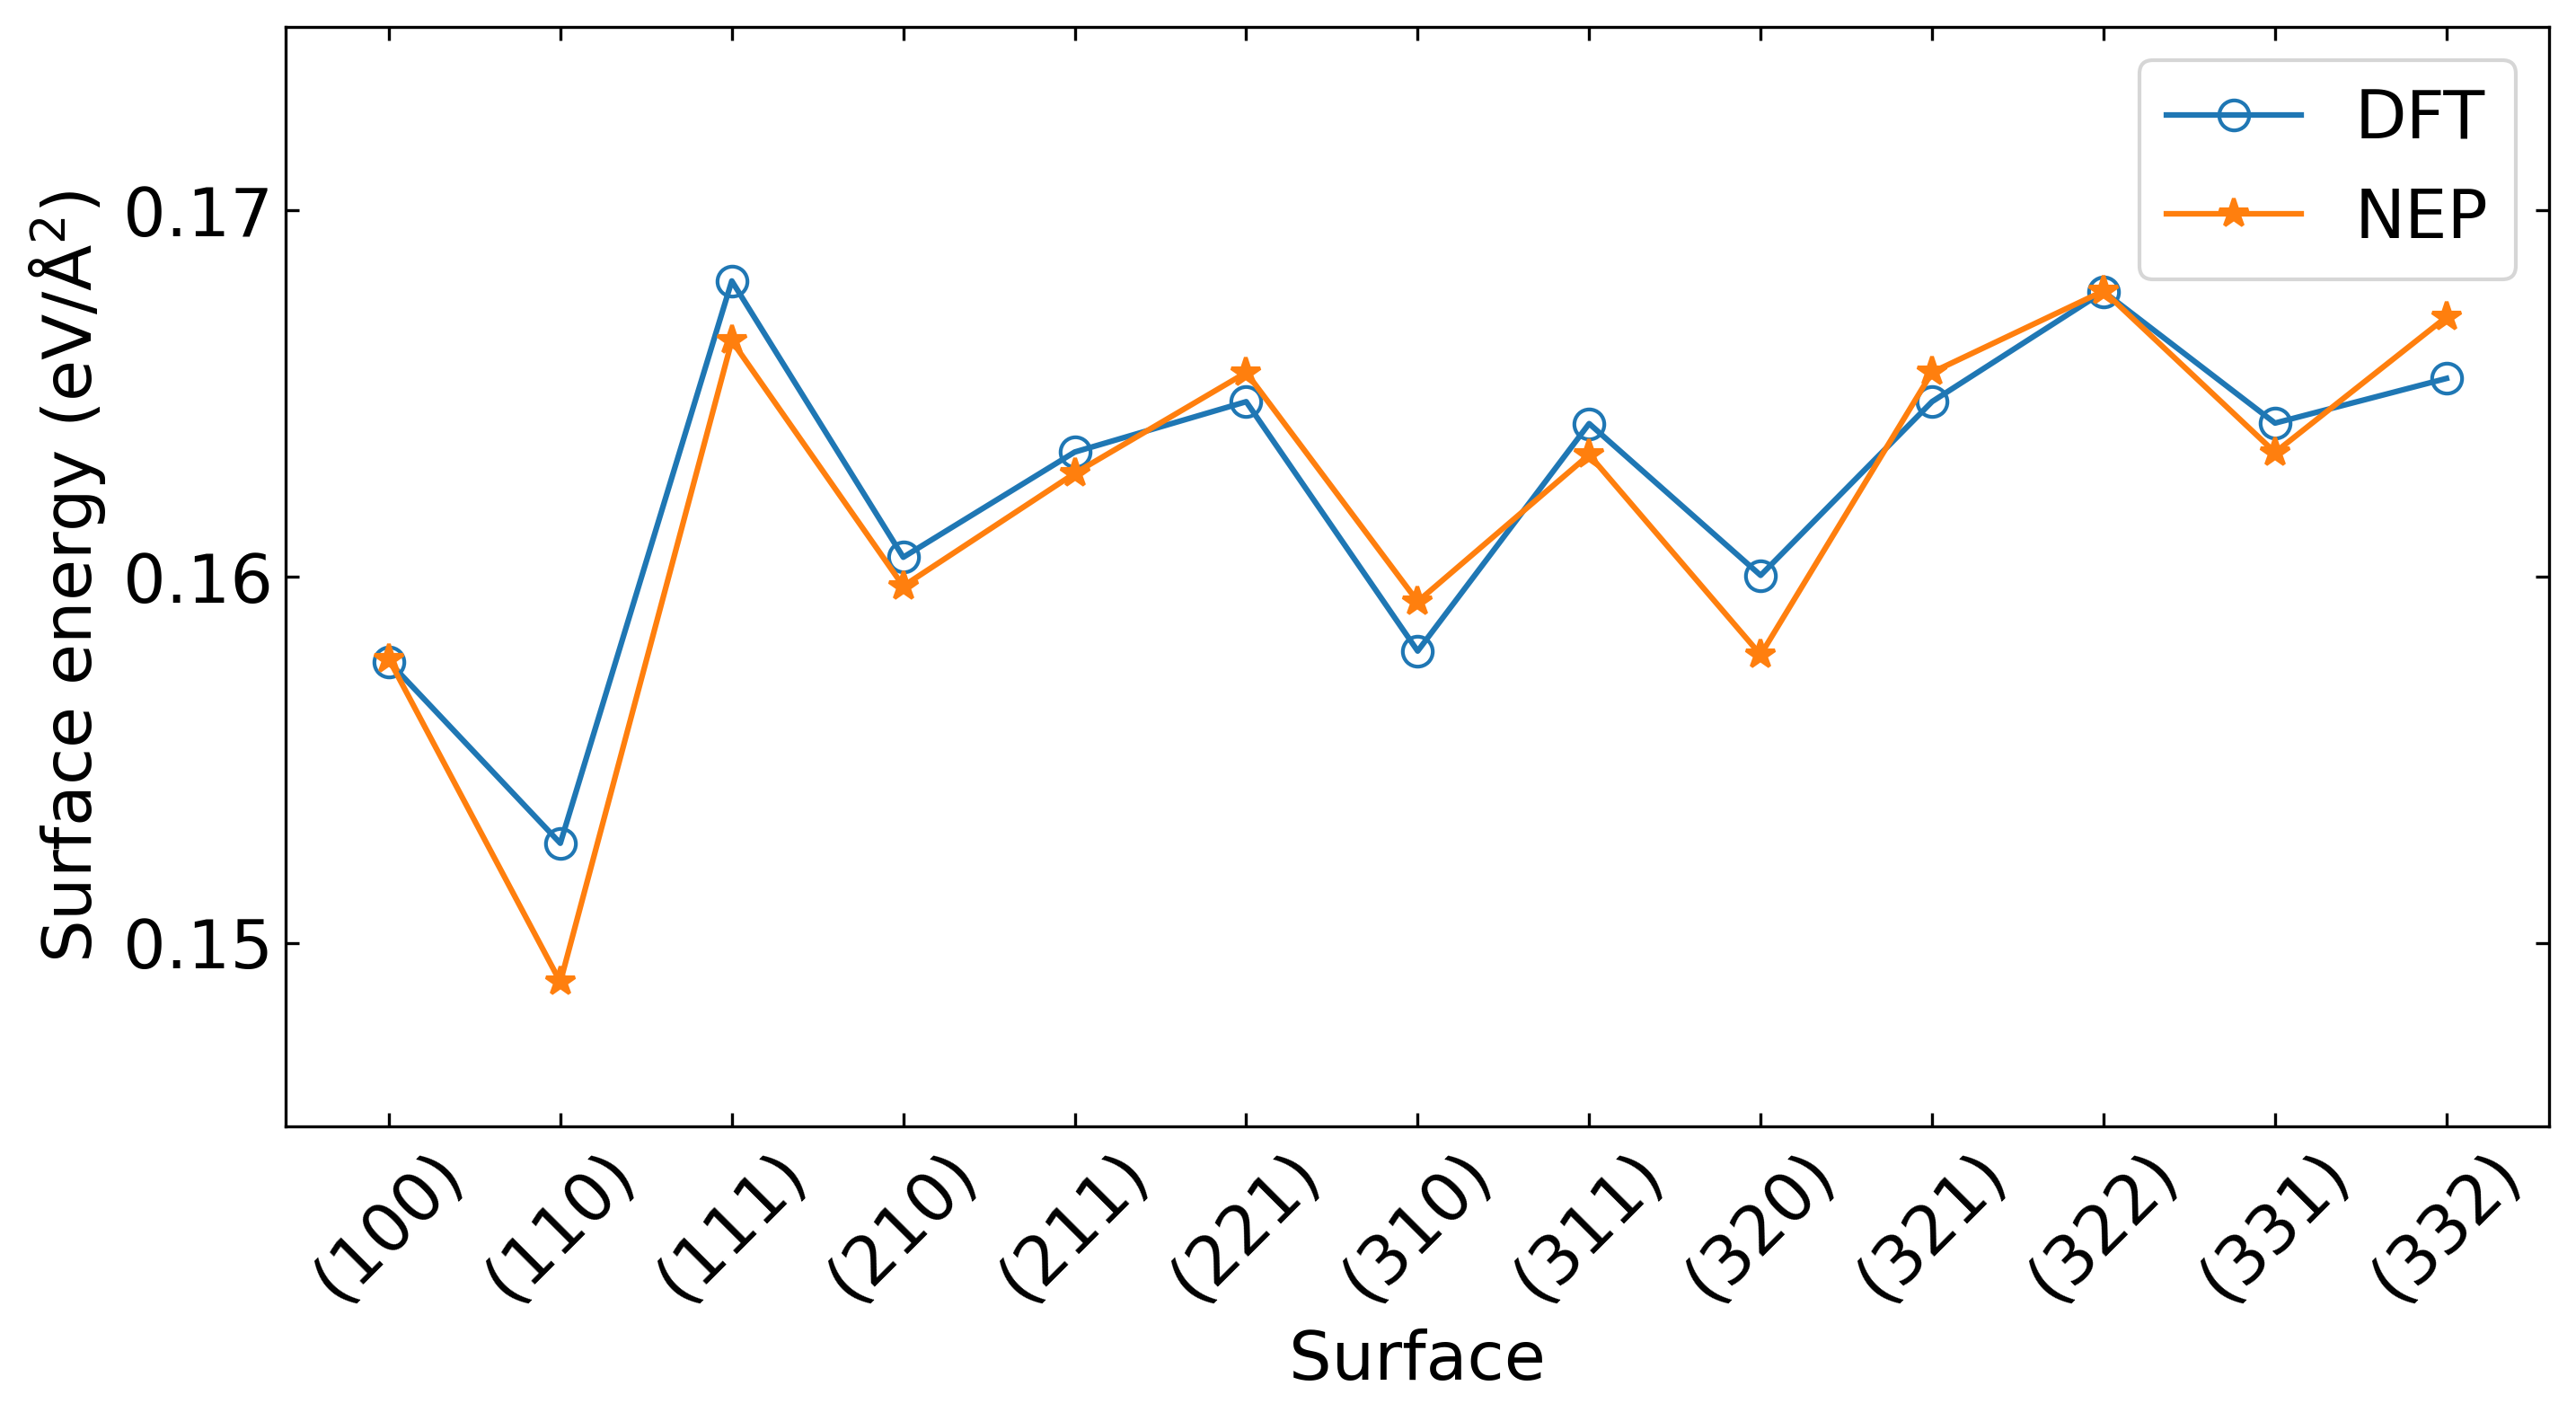

In [106]:
from wizard.calculator import MaterialCalculator
from wizard.atoms import SymbolInfo
%matplotlib inline
from wizard.io import read_xyz
import matplotlib.pyplot as plt 
import numpy as np

volumes, dft, nep = [], [], []

bulk = read_xyz('xyz/bulk.xyz')
coh = bulk[-1]
coh_dft = coh.info['energy'] / len(coh)
coh.calc = calc
# relax(coh)
coh_nep = coh.get_potential_energy() / len(coh)

frames = read_xyz('xyz/surface.xyz')
for atoms in frames:
    S = atoms.cell[0,0] * atoms.cell[1, 1]
    dft.append((atoms.info['energy'] - coh_dft * len(atoms)) / (2*S))
    atoms.calc = calc
    # relax(atoms)
    # S = atoms.cell[0,0] * atoms.cell[1, 1]
    nep.append((atoms.get_potential_energy() - coh_nep * len(atoms)) / (2*S))

# with open('MaterialProperties.out', 'a') as f:
#     f.write(f' surfaceenergy DFTconf_opt (1,0,0): DFT={dft[0]:.4f} eV, NEP={nep[0]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (1,1,0): DFT={dft[1]:.4f} eV, NEP={nep[1]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (1,1,1): DFT={dft[2]:.4f} eV, NEP={nep[2]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (2,1,0): DFT={dft[3]:.4f} eV, NEP={nep[3]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (2,1,1): DFT={dft[4]:.4f} eV, NEP={nep[4]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (2,2,1): DFT={dft[5]:.4f} eV, NEP={nep[5]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (3,1,0): DFT={dft[6]:.4f} eV, NEP={nep[6]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (3,1,1): DFT={dft[7]:.4f} eV, NEP={nep[7]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (3,2,0): DFT={dft[8]:.4f} eV, NEP={nep[8]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (3,2,1): DFT={dft[9]:.4f} eV, NEP={nep[9]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (3,2,2): DFT={dft[10]:.4f} eV, NEP={nep[10]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (3,3,1): DFT={dft[11]:.4f} eV, NEP={nep[11]:.4f} eV\n')
#     f.write(f' surfaceenergy DFTconf_opt (3,3,2): DFT={dft[12]:.4f} eV, NEP={nep[12]:.4f} eV\n')

# symbol_info = SymbolInfo('Fe', 'bcc', 2.83)
# atoms = symbol_info.create_bulk_atoms()
# material_calculator = MaterialCalculator(atoms, calc, symbol_info)
# millers = [(1,0,0), (1,1,0), (1,1,1), (2,1,0), (2,1,1), (2,2,1), (3,1,0), (3,1,1), (3,2,0), (3,2,1), (3,2,2), (3,3,1), (3,3,2)]
# for miller in millers:
#     slabE = material_calculator.formation_energy_surface(miller)
#     nep.append(slabE / 1000)

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)
# ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.01))

nep = np.array(nep)
dft = np.array(dft)
names = ['(100)','(110)', '(111)', '(210)', '(211)', '(221)', '(310)', '(311)', '(320)', '(321)', '(322)', '(331)', '(332)']
x = np.arange(len(names))

ax.plot(x, dft, '-o', label = 'DFT', fillstyle='none', markersize = 8, color='#1f77b4')
ax.plot(x, nep, '-*', label = 'NEP', markersize = 8, color='#ff7f0e')

ax.set_ylim([0.145, 0.175])
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
ax.set_xlabel('Surface')
ax.set_ylabel('Surface energy (eV/Å$^2$)')
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('Surface_formation.png')

熔点

In [ ]:
from wizard.io import read_restart
from wizard.atoms import SymbolInfo, Morph

atoms = SymbolInfo('Fe', 'bcc', 2.8).create_bulk_atoms((15, 15, 30))
group = []
for atom in atoms:
    if atom.position[2] < atoms.cell[2, 2] / 2:
        group.append(0)
    else:
        group.append(1)
atoms.info['group'] = group

run_in_1 = ['potential nep.txt', 
            'velocity 1500', 
            'time_step 1', 
            'ensemble npt_ber 1500 1500 200 0 500 2000', 
            'dump_exyz 10000', 
            'dump_thermo 1000',
            'run 30000',
            'ensemble heat_lan 2000 200 500 0 1',
            'dump_exyz 10000',
            'dump_thermo 1000',
            'dump_restart 10000',
            'run 1000000']

Morph(atoms).gpumd('melting_point/relax', run_in_1)

for Tm in range(1850, 1900, 10):
    atoms = read_restart('melting_point/relax/restart.xyz')
    run_in = ['potential nep.txt', 
             f'velocity {Tm}', 
              'time_step 1', 
             f'ensemble npt_ber {Tm} {Tm} 200 0 500 2000', 
              'dump_exyz 10000', 
              'dump_thermo 1000',
              'run 100000']
    Morph(atoms).gpumd(f'melting_point/{Tm}', run_in)

再结晶

In [ ]:
from wizard.atoms import SymbolInfo, Morph

atoms = SymbolInfo('Fe', 'bcc', 2.8).create_bulk_atoms((15, 15, 15))
run_in = ['potential nep.txt', 
          'velocity 500', 
          'time_step 1', 
          'ensemble npt_scr 500 500 200 0 500 2000', 
          'dump_thermo 1000', 
          'dump_exyz 10000', 
          'dump_restart 10000', 
          'run 100000',
          'ensemble npt_scr 500 2500 200 0 500 2000',
          'dump_thermo 1000', 
          'dump_exyz 100000', 
          'dump_restart 10000', 
          'run 10000000',
          'ensemble npt_scr 2500 2500 200 0 500 2000',
          'dump_thermo 1000', 
          'dump_exyz 10000', 
          'dump_restart 10000', 
          'run 100000',
          'ensemble npt_scr 2500 500 200 0 500 2000',
          'dump_thermo 1000', 
          'dump_exyz 100000', 
          'dump_restart 10000', 
          'run 10000000']
Morph(atoms).gpumd(dirname='crystallization', nep_path='nep.txt', run_in=run_in)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams.update({"font.size": 16, "text.usetex": False})

fig, ax = plt.subplots()
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

window_size = 500

data = np.loadtxt('thermo.out')
data = data[20:]
data1 = data[:10000]
data2 = data[10000:]

Temperature1 = data1[:, 0]
volumes1 = data1[:, 9] * data1[:, 10] * data1[:, 11] / 6750
Temperature2 = data2[:, 0]
volumes2 = data2[:, 9] * data2[:, 10] * data2[:, 11] / 6750

smoothed_volumes1 = moving_average(volumes1, window_size)
smoothed_volumes2 = moving_average(volumes2, window_size)

Temperature1 = Temperature1[window_size-1:]
Temperature2 = Temperature2[window_size-1:]

ax.plot(Temperature1, smoothed_volumes1, '-', color='#ff7f0e', label = 'heating')
ax.plot(Temperature2, smoothed_volumes2, '-', color='#1f77b4', label = 'cooling')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Volume (Å$^3$/atom)')
plt.legend()
plt.subplots_adjust(left = 0.2, bottom=0.2)
fig.savefig('crystallization.png')

rdf

In [ ]:
from wizard.atoms import SymbolInfo, Morph

atoms = SymbolInfo('Fe', 'bcc', 2.8).create_bulk_atoms((20, 20, 20))
run_in = ['potential nep.txt', 
          'velocity 1920', 
          'time_step 1', 
          'ensemble npt_scr 1920 1920 200 0 500 2000', 
          'compute_rdf 12 400 1000',
          'dump_exyz 100000',
          'dump_thermo 1000',
          'run 300000']
Morph(atoms).gpumd(dirname='melting', nep_path='nep.txt', run_in=run_in)

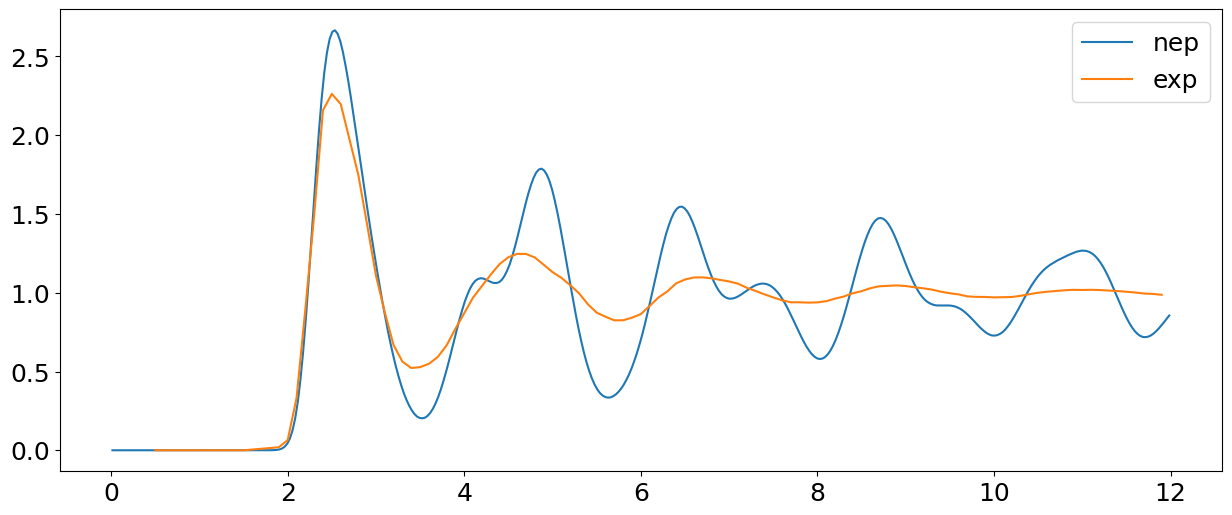

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('md_out/rdf.out')
plt.plot(data[:,0],data[:,1], label='nep')
data = np.loadtxt('md_out/exprdf.out')
plt.plot(data[:,0],data[:,1], label='exp')
plt.legend()
plt.show()

晶界形成能

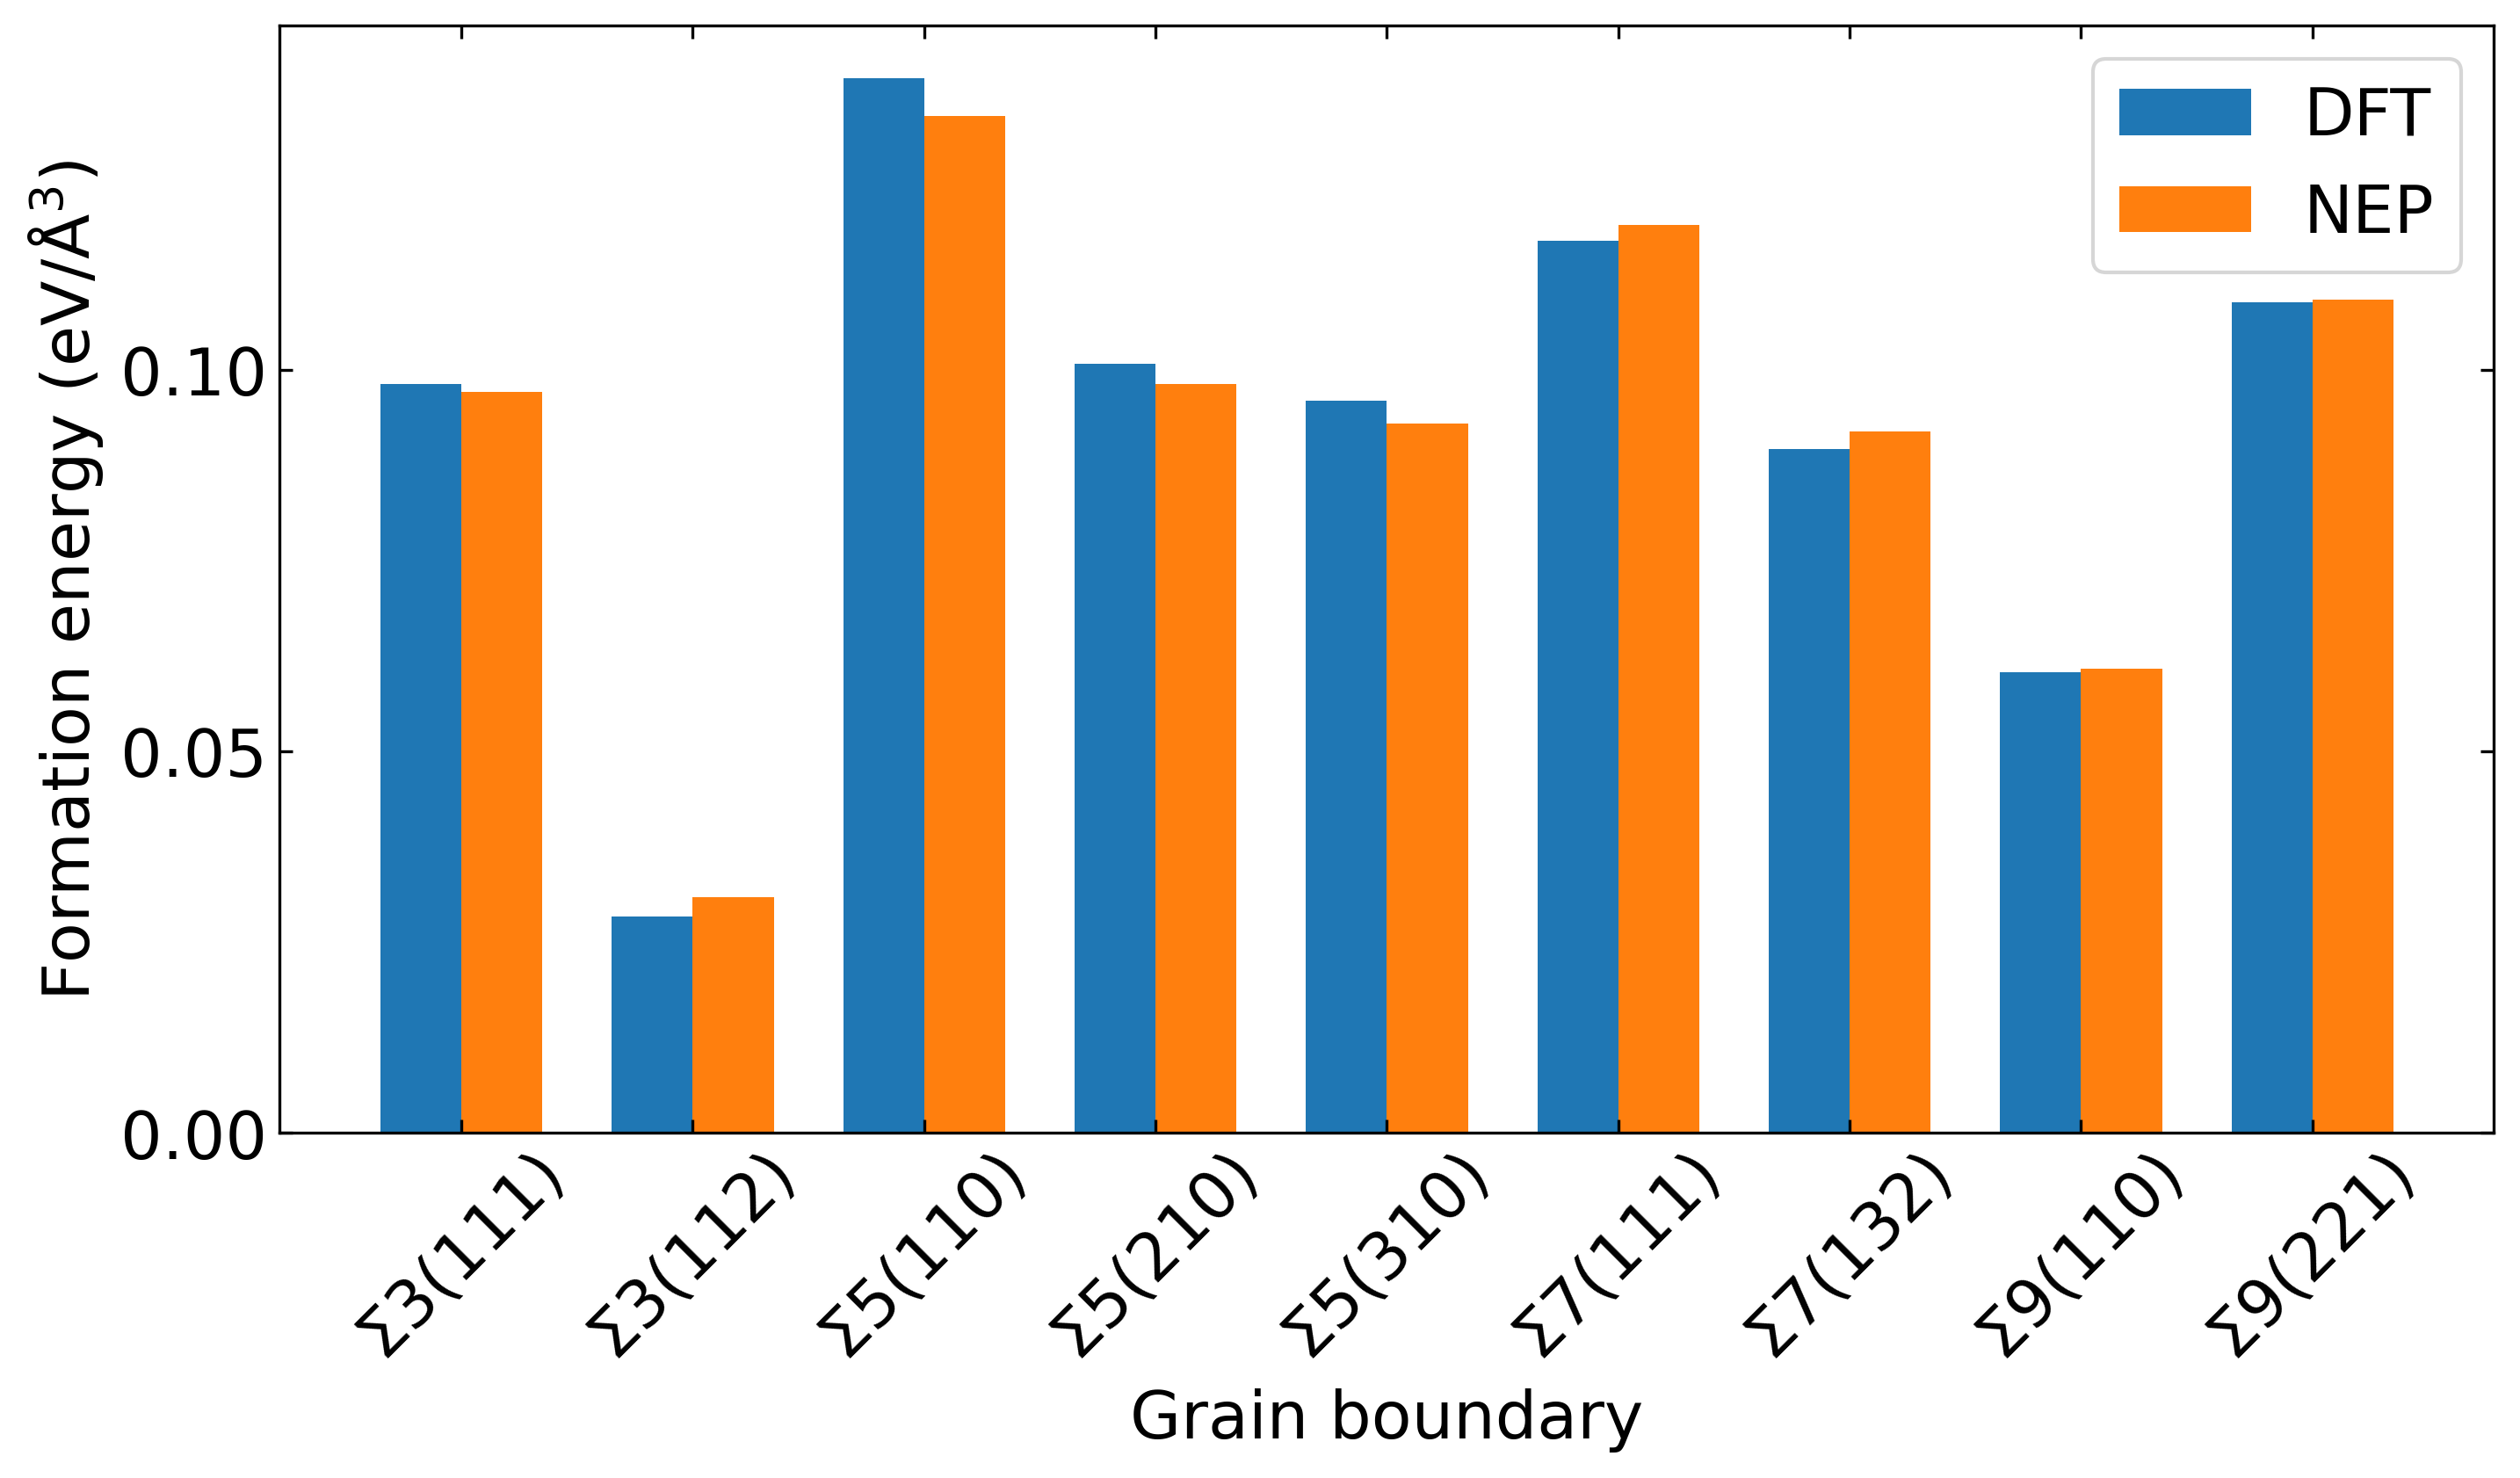

In [105]:
%matplotlib inline
from wizard.io import read_xyz, relax
import matplotlib.pyplot as plt 
import numpy as np

volumes, dft, nep = [], [], []

bulk = read_xyz('xyz/bulk.xyz')
coh = bulk[-1]
coh_dft = coh.info['energy'] / len(coh)
coh.calc = calc
# relax(coh)
coh_nep = coh.get_potential_energy() / len(coh)

frames = read_xyz('xyz/grain_boundary.xyz')
for atoms in frames:
    S = atoms.cell[0,0] * atoms.cell[1, 1]
    dft.append((atoms.info['energy'] - coh_dft * len(atoms)) / (2*S))
    atoms.calc = calc
    # relax(atoms)
    # S = atoms.cell[0,0] * atoms.cell[1, 1]
    nep.append((atoms.get_potential_energy() - coh_nep * len(atoms)) / (2*S))

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)
ax.yaxis.set_major_locator(MultipleLocator(0.05))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.8)

names = ['$\Sigma$3(111)', '$\Sigma$3(112)', '$\Sigma$5(110)', '$\Sigma$5(210)', '$\Sigma$5(310)', '$\Sigma$7(111)', '$\Sigma$7(132)', '$\Sigma$9(110)', '$\Sigma$9(221)']

x = np.arange(len(names))
width = 0.35

ax.bar(x - width/2, dft, width, label='DFT', color='#1f77b4')
ax.bar(x + width/2, nep, width, label='NEP', color='#ff7f0e')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
ax.set_xlabel('Grain boundary')
ax.set_ylabel('Formation energy (eV/Å$^3$)')
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('GB_formation.png')

螺旋位错差分图

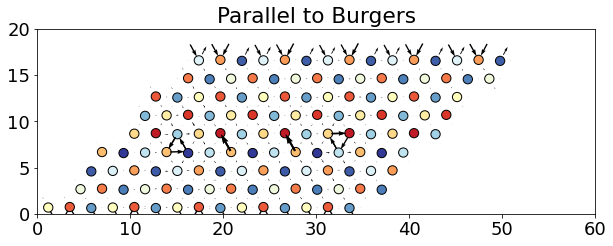

In [79]:
import atomman as am
import numpy as np
from atomman.defect import DifferentialDisplacement
import matplotlib.pyplot as plt

def layer_color(atom_position, burgers):
    layer = np.round(atom_position[2] / np.linalg.norm(burgers) * 3) % 3 
    layer = int(layer)
    if layer == 0:
        return 'red'
    elif layer == 1:
        return 'green'
    elif layer == 2:
        return 'blue'

alat = 2.83
burgers = np.array([alat/2, alat/2, alat/2])

# Load the relaxed structure
system_0 = am.load('poscar', 'str/POSCAR.0')
system_1 = am.load('poscar', 'str/POSCAR.1')

neighbors = system_0.neighborlist(cutoff=0.9 * alat)
# Calculate the differential displacement vectors
dd = DifferentialDisplacement(system_0, system_1, neighbors=neighbors, reference=0)
ddmax = np.linalg.norm(burgers)

params = {}
params['plotxaxis'] = 'x'
params['plotyaxis'] = 'y'
params['xlim'] = (0, 60)
params['ylim'] = (0, 20)
params['zlim'] = (-0.01, np.linalg.norm(burgers) + 0.01) 
params['figsize'] = 10         
params['arrowwidth'] = 1/250  
params['arrowscale'] = 1.7     

dd.plot(burgers, ddmax, atomcmap='RdYlBu',**params)
plt.title('Parallel to Burgers')
plt.savefig('figure.png', dpi=1200)

螺位错-single

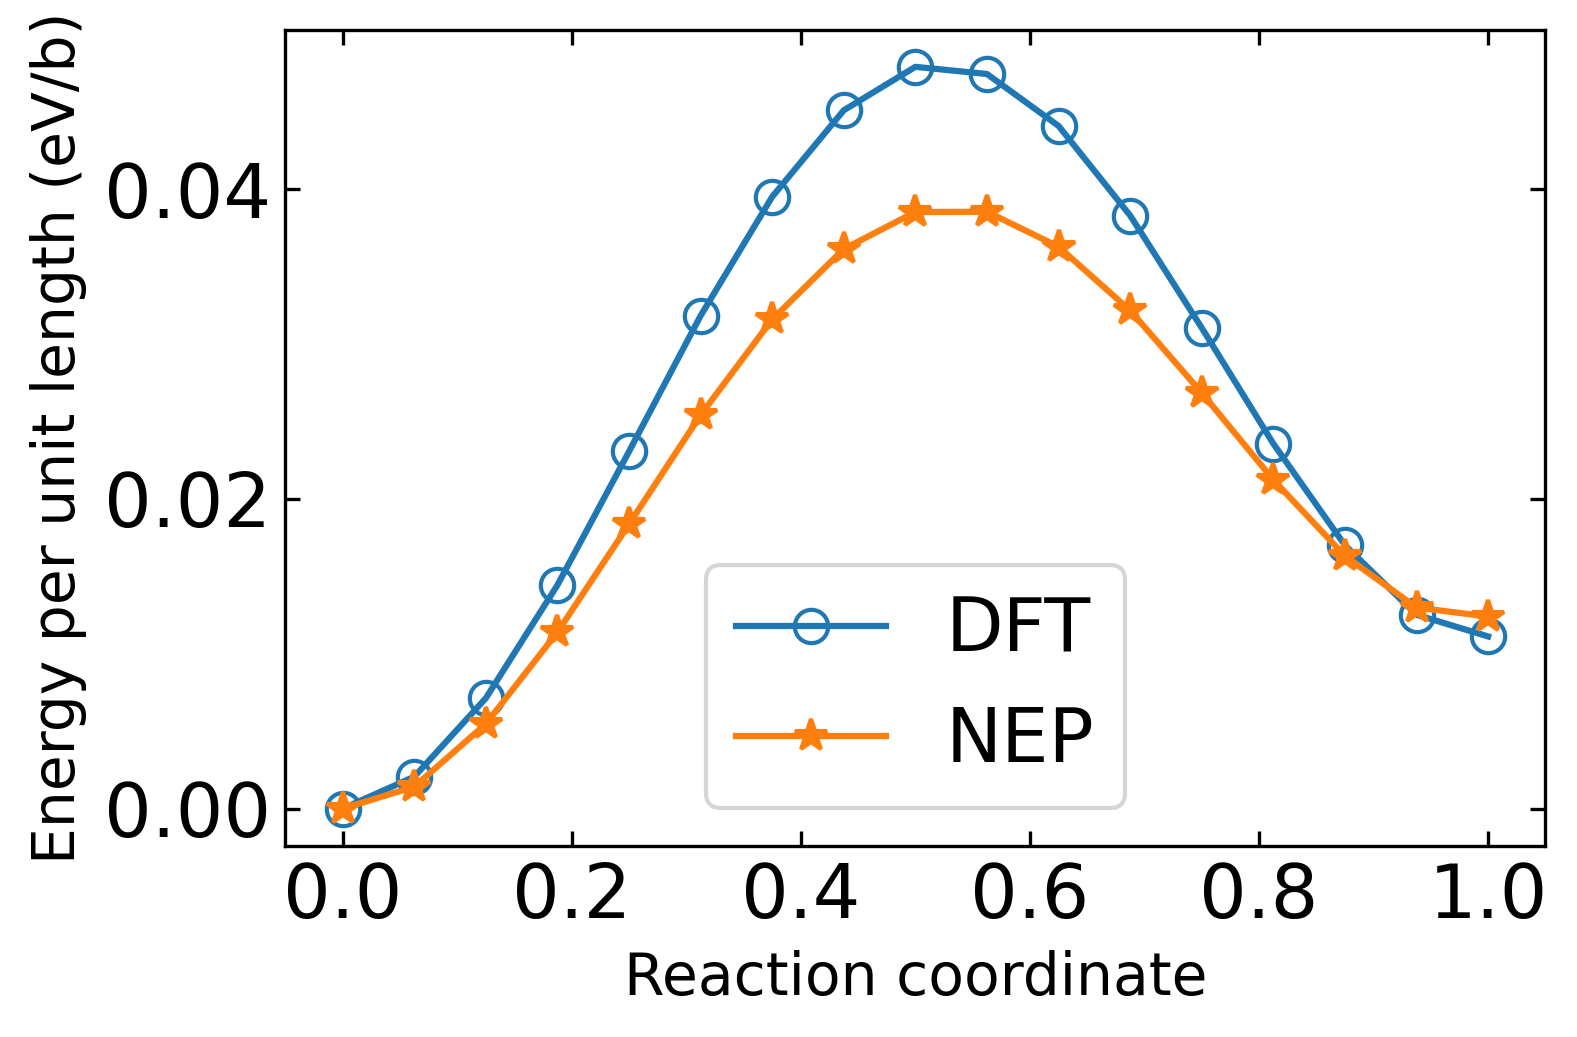

In [28]:
%matplotlib inline
from wizard.io import read_xyz
import matplotlib.pyplot as plt 
import numpy as np

dft, nep = [], []

frames = read_xyz('xyz/single_dislocation.xyz')
ref_energy_dft = frames[0].info['energy']
frames[0].calc = calc
ref_energy_dft = frames[0].get_potential_energy()
for atoms in frames:
    dft.append((atoms.info['energy']))
    atoms.calc = calc
    nep.append((atoms.get_potential_energy()))

dft = np.array(dft) - min(dft)
nep = np.array(nep) - min(nep)

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

x = np.linspace(0, 1, len(nep))

ax.plot(x, dft, '-o', label = 'DFT', fillstyle='none', markersize = 8, color='#1f77b4')
ax.plot(x, nep, '-*', label = 'NEP', markersize = 8, color='#ff7f0e')

ax.set_xticks(np.arange(0, 1.02, 0.2))  # 设置x轴的刻度
ax.set_xlabel('Reaction coordinate',fontsize=14)
ax.set_ylabel('Energy per unit length (eV/b)',fontsize=14)
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('single_dislocation.png')

螺位错-dipole

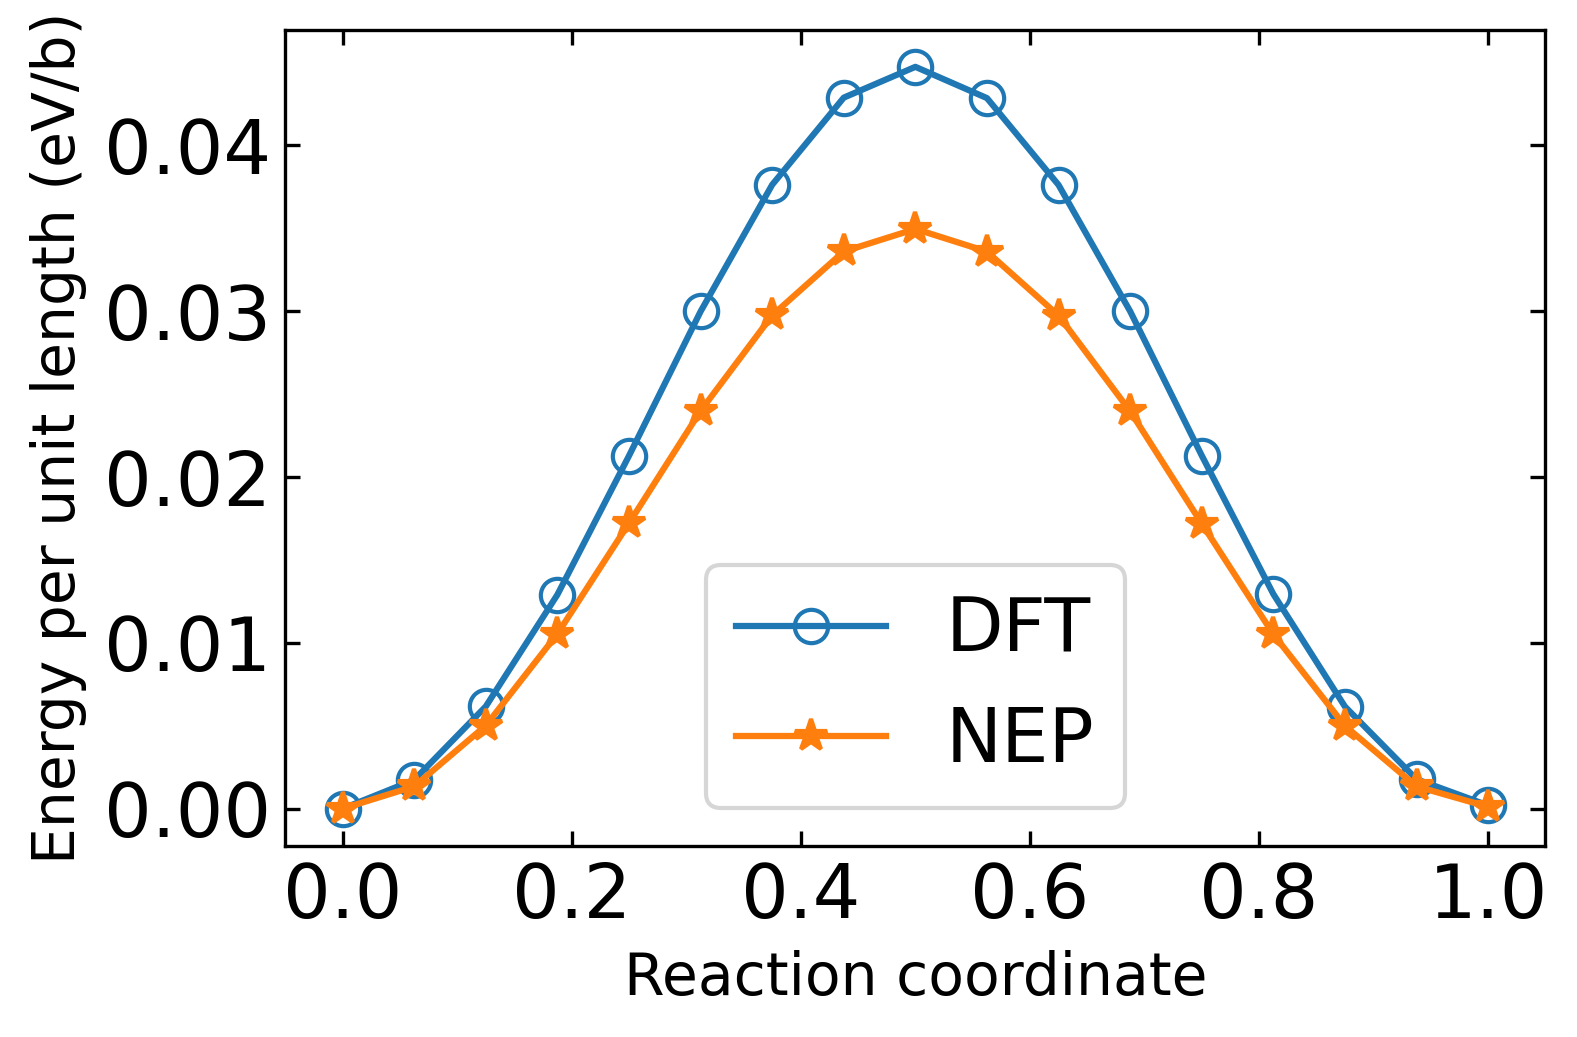

In [32]:
%matplotlib inline
from wizard.io import read_xyz
import matplotlib.pyplot as plt 
import numpy as np

dft, nep = [], []

frames = read_xyz('xyz/dipole_dislocation.xyz')
for atoms in frames:
    dft.append((atoms.info['energy']))
    atoms.calc = calc
    nep.append((atoms.get_potential_energy()))

dft = np.array(dft) - min(dft)
nep = np.array(nep) - min(nep)

dft = dft / 2
nep = nep / 2

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

x = np.linspace(0, 1, len(nep))

ax.plot(x, dft, '-o', label = 'DFT', fillstyle='none', markersize = 8, color='#1f77b4')
ax.plot(x, nep, '-*', label = 'NEP', markersize = 8, color='#ff7f0e')

ax.set_xticks(np.arange(0, 1.02, 0.2))  # 设置x轴的刻度
ax.set_xlabel('Reaction coordinate',fontsize=14)
ax.set_ylabel('Energy per unit length (eV/b)',fontsize=14)
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('dipole_dislocation.png')

C15迁移能

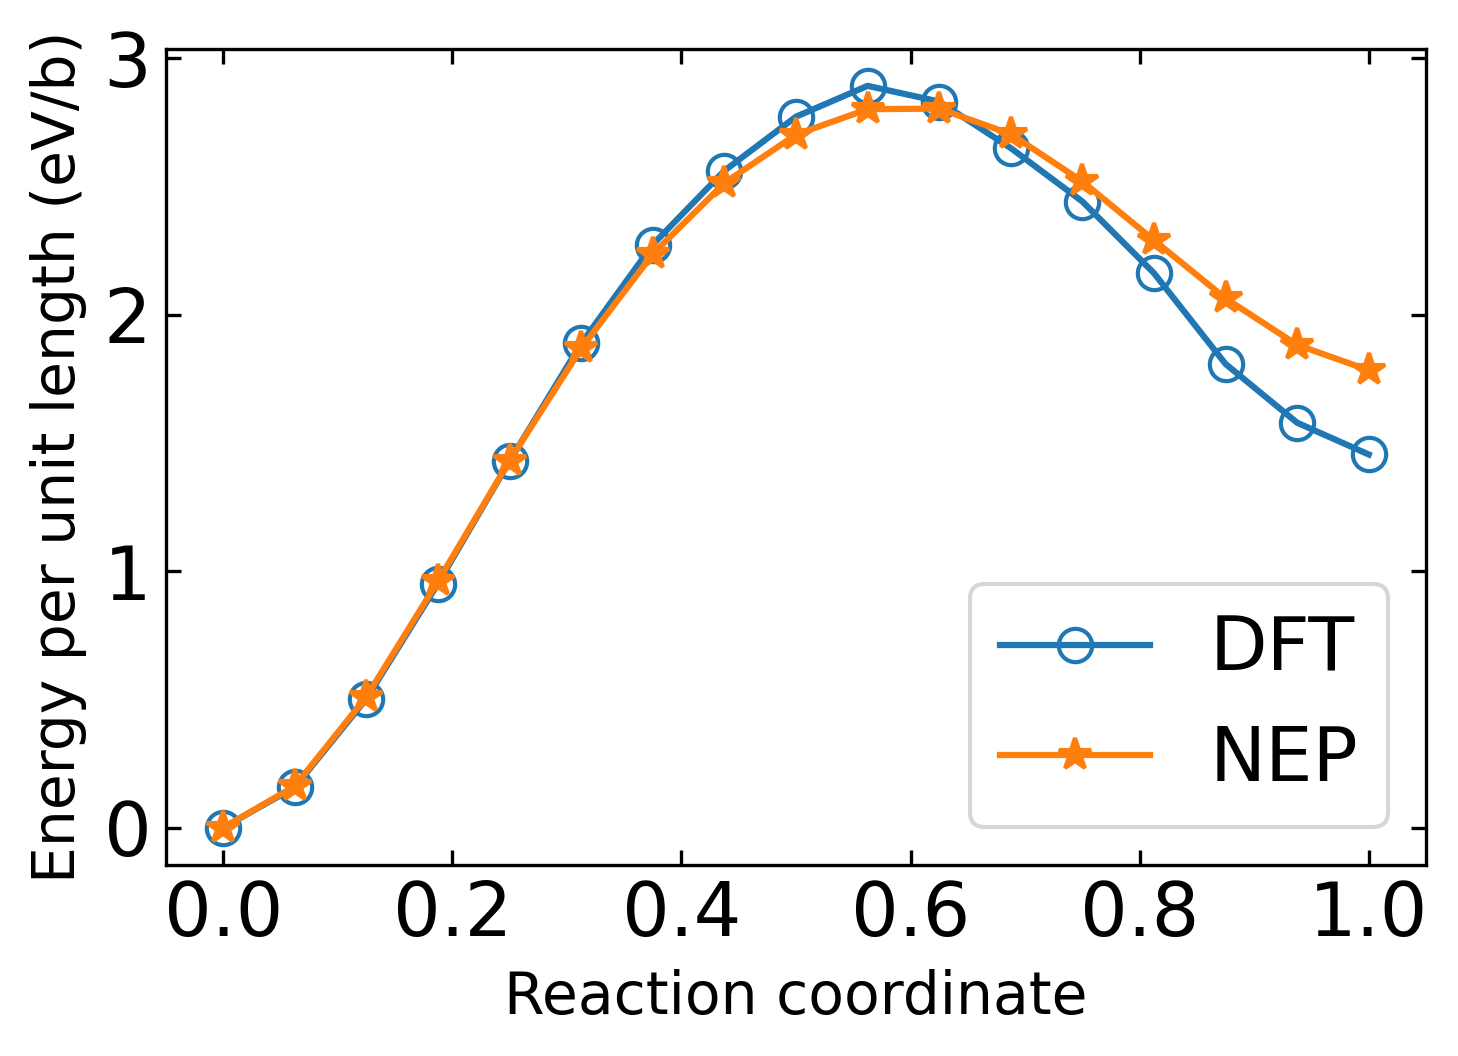

In [36]:
%matplotlib inline
from wizard.io import read_xyz
import matplotlib.pyplot as plt 
import numpy as np

dft, nep, eam = [], [], []

frames = read_xyz('xyz/C15.xyz')
for atoms in frames:
    dft.append((atoms.info['energy']))
    atoms.calc = calc
    nep.append((atoms.get_potential_energy()))

dft = np.array(dft) - min(dft)
nep = np.array(nep) - min(nep)

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

x = np.linspace(0, 1, len(nep))

ax.plot(x, dft, '-o', label = 'DFT', fillstyle='none', markersize = 8, color='#1f77b4')
ax.plot(x, nep, '-*', label = 'NEP', markersize = 8, color='#ff7f0e')

ax.set_xticks(np.arange(0, 1.02, 0.2))  # 设置x轴的刻度
ax.set_xlabel('Reaction coordinate',fontsize=14)
ax.set_ylabel('Energy per unit length (eV/b)',fontsize=14)
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('C15.png')

堆垛层错-110

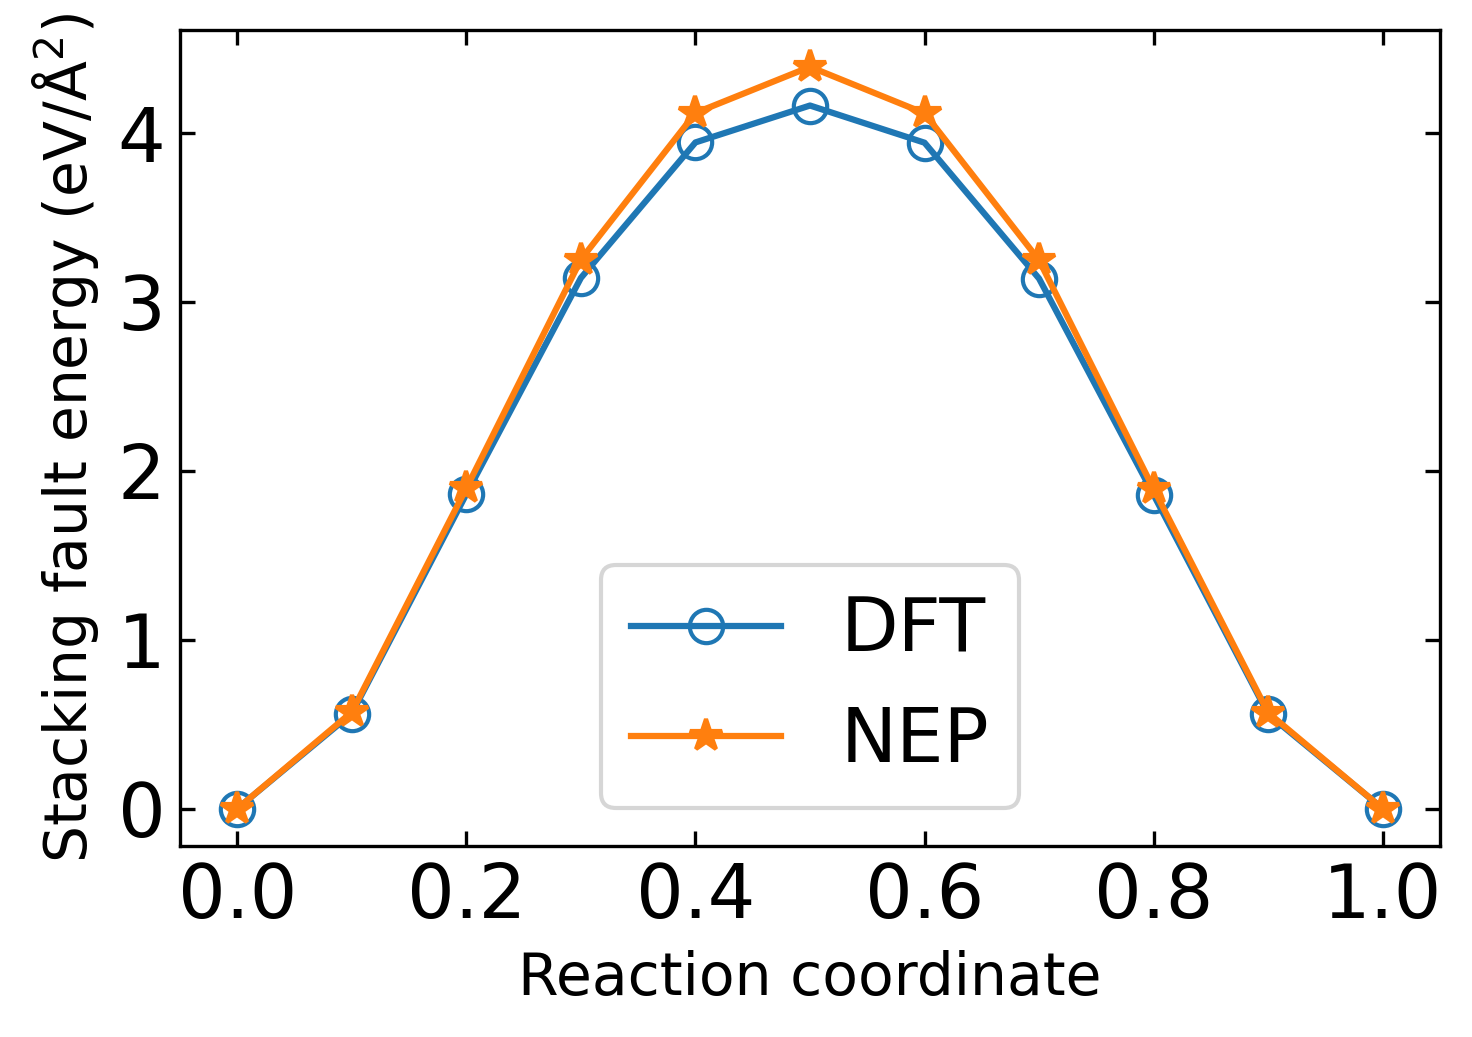

In [41]:
%matplotlib inline
from wizard.io import read_xyz
import matplotlib.pyplot as plt 
import numpy as np

dft, nep = [], []

frames = read_xyz('xyz/110GSF.xyz')
ref_energy_dft = frames[0].info['energy']
frames[0].calc = calc
ref_energy_dft = frames[0].get_potential_energy()
for atoms in frames:
    dft.append((atoms.info['energy']))
    atoms.calc = calc
    nep.append((atoms.get_potential_energy()))

dft = np.array(dft) - min(dft)
nep = np.array(nep) - min(nep)

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

x = np.linspace(0, 1, len(nep))

ax.plot(x, dft, '-o', label = 'DFT', fillstyle='none', markersize = 8, color='#1f77b4')
ax.plot(x, nep, '-*', label = 'NEP', markersize = 8, color='#ff7f0e')

ax.set_xticks(np.arange(0, 1.02, 0.2))  # 设置x轴的刻度
ax.set_xlabel('Reaction coordinate',fontsize=14)
ax.set_ylabel('Stacking fault energy (eV/Å$^2$)',fontsize=14)
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('stacking_110.png')

堆垛层错-112

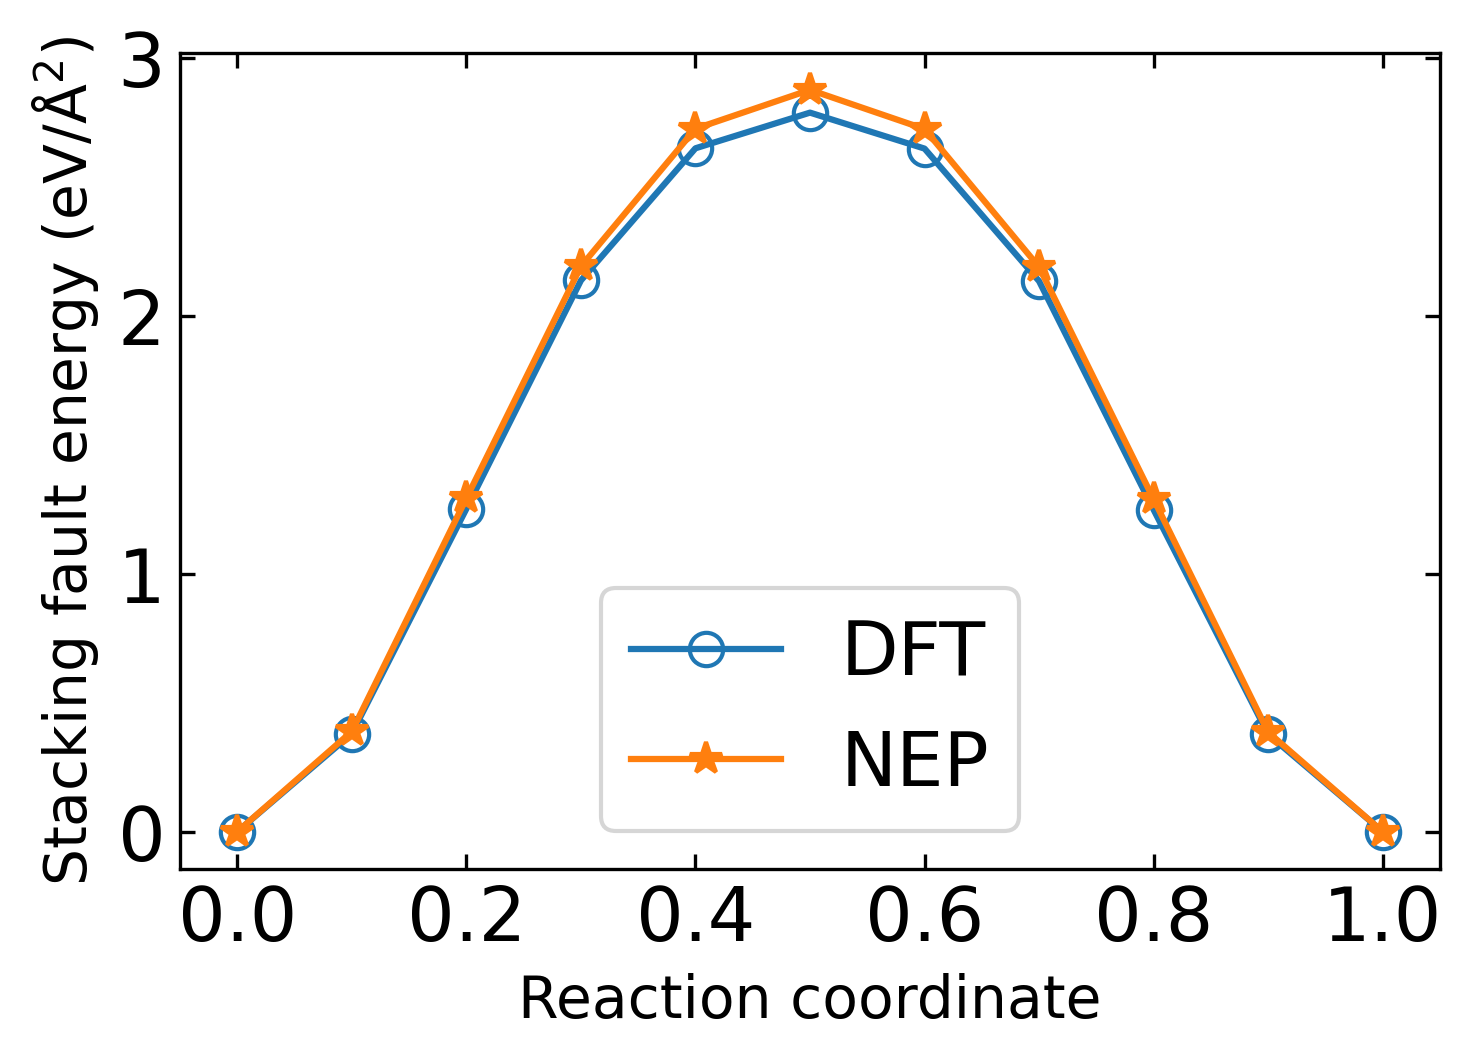

In [40]:
%matplotlib inline
from wizard.io import read_xyz
import matplotlib.pyplot as plt 
import numpy as np

dft, nep = [], []

frames = read_xyz('xyz/112GSF.xyz')
for atoms in frames:
    dft.append((atoms.info['energy']))
    atoms.calc = calc
    nep.append((atoms.get_potential_energy()))

dft = np.array(dft) - min(dft)
nep = np.array(nep) - min(nep)

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

x = np.linspace(0, 1, len(nep))

ax.plot(x, dft, '-o', label = 'DFT', fillstyle='none', markersize = 8, color='#1f77b4')
ax.plot(x, nep, '-*', label = 'NEP', markersize = 8, color='#ff7f0e')

ax.set_xticks(np.arange(0, 1.02, 0.2))  # 设置x轴的刻度
ax.set_xlabel('Reaction coordinate',fontsize=14)
ax.set_ylabel('Stacking fault energy (eV/Å$^2$)',fontsize=14)
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('stacking_112.png')

拉伸

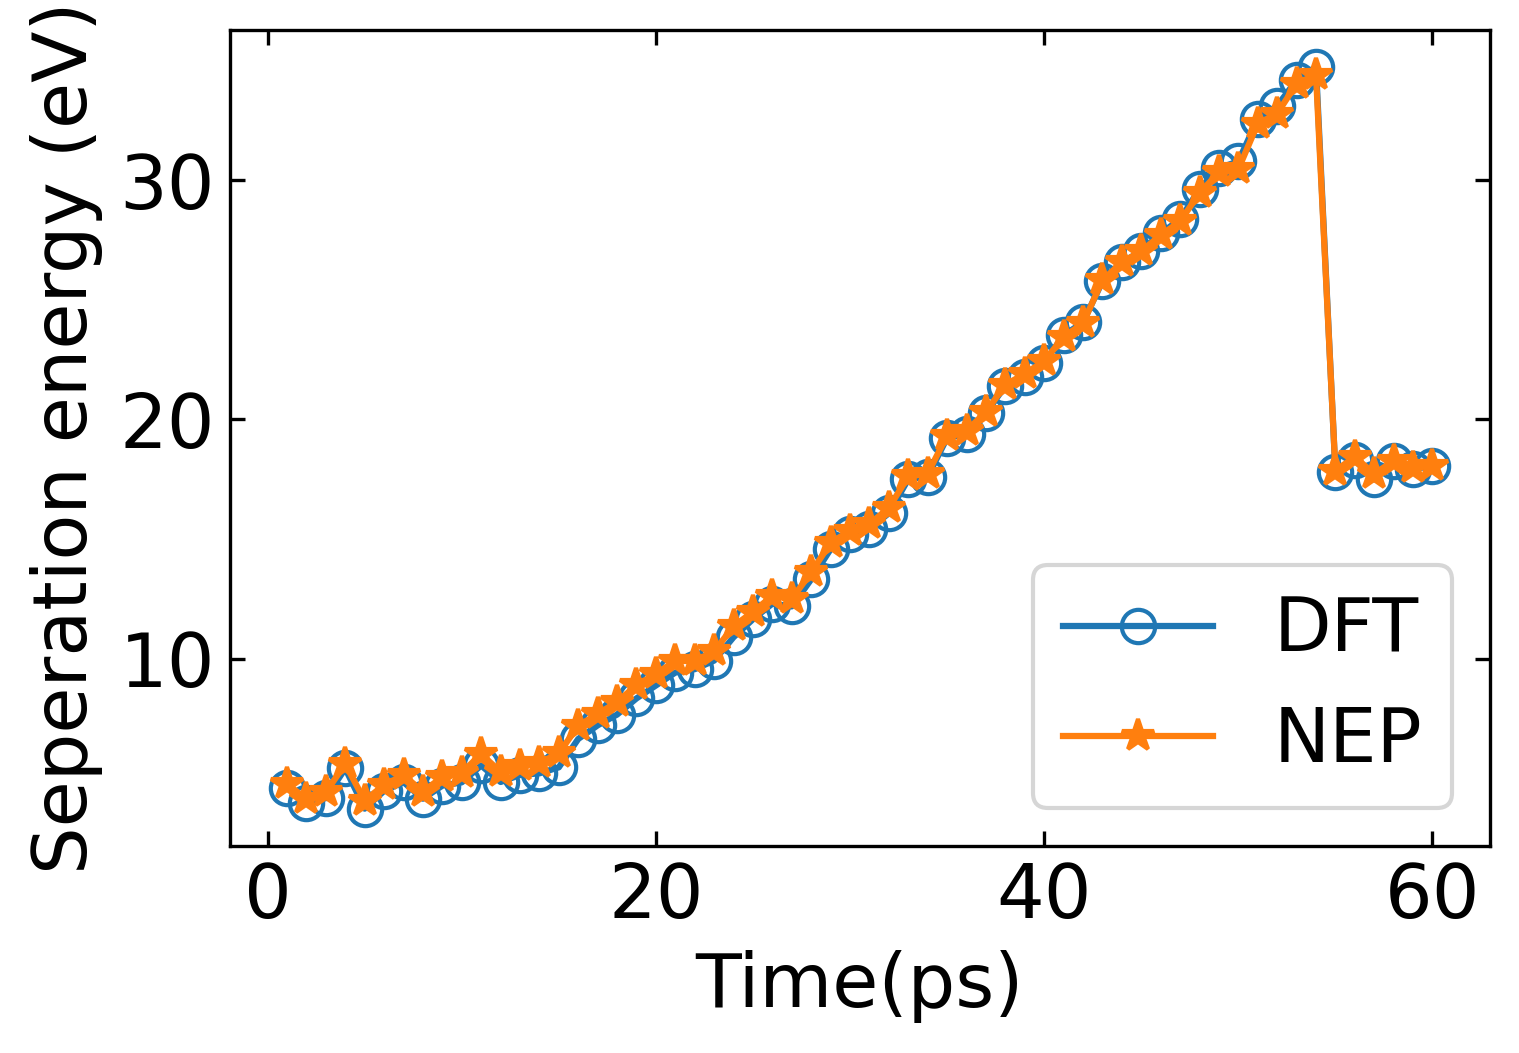

In [76]:
%matplotlib inline
from wizard.io import read_xyz
import matplotlib.pyplot as plt 
import numpy as np

dft, nep = [], []

frames = read_xyz('xyz/strain.xyz')
ref_energy_dft = frames[0].info['energy']
frames[0].calc = calc
ref_energy_nep = frames[0].get_potential_energy()

for atoms in frames:
    dft.append((atoms.info['energy'] - ref_energy_dft ))
    atoms.calc = calc
    nep.append((atoms.get_potential_energy() - ref_energy_nep))

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

names = ['0','10','20','30','40','50','60','70','80','90','100','110','120','130','140','150','160','170','180','190','200','210','220','230','240','250','260','270','280','290','300','310'
,'320','330','340','350','360','370','380','390','400','410','420','430','440','450','460','470','480','490','500','510','520','530','540','550','560','570','580','590','600']
x = np.arange(len(names))

ax.plot(x[1:], dft[1:], '-o', label = 'DFT', fillstyle='none', markersize = 8, color='#1f77b4')
ax.plot(x[1:], nep[1:], '-*', label = 'NEP', markersize = 8, color='#ff7f0e')

# ax.set_xticks(x)
# ax.set_xticklabels(names)
ax.set_xlabel('Time(ps)')
ax.set_ylabel('Seperation energy (eV)')
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend(loc='lower right')
fig.savefig('Seperationenergy_strain.png')

压缩

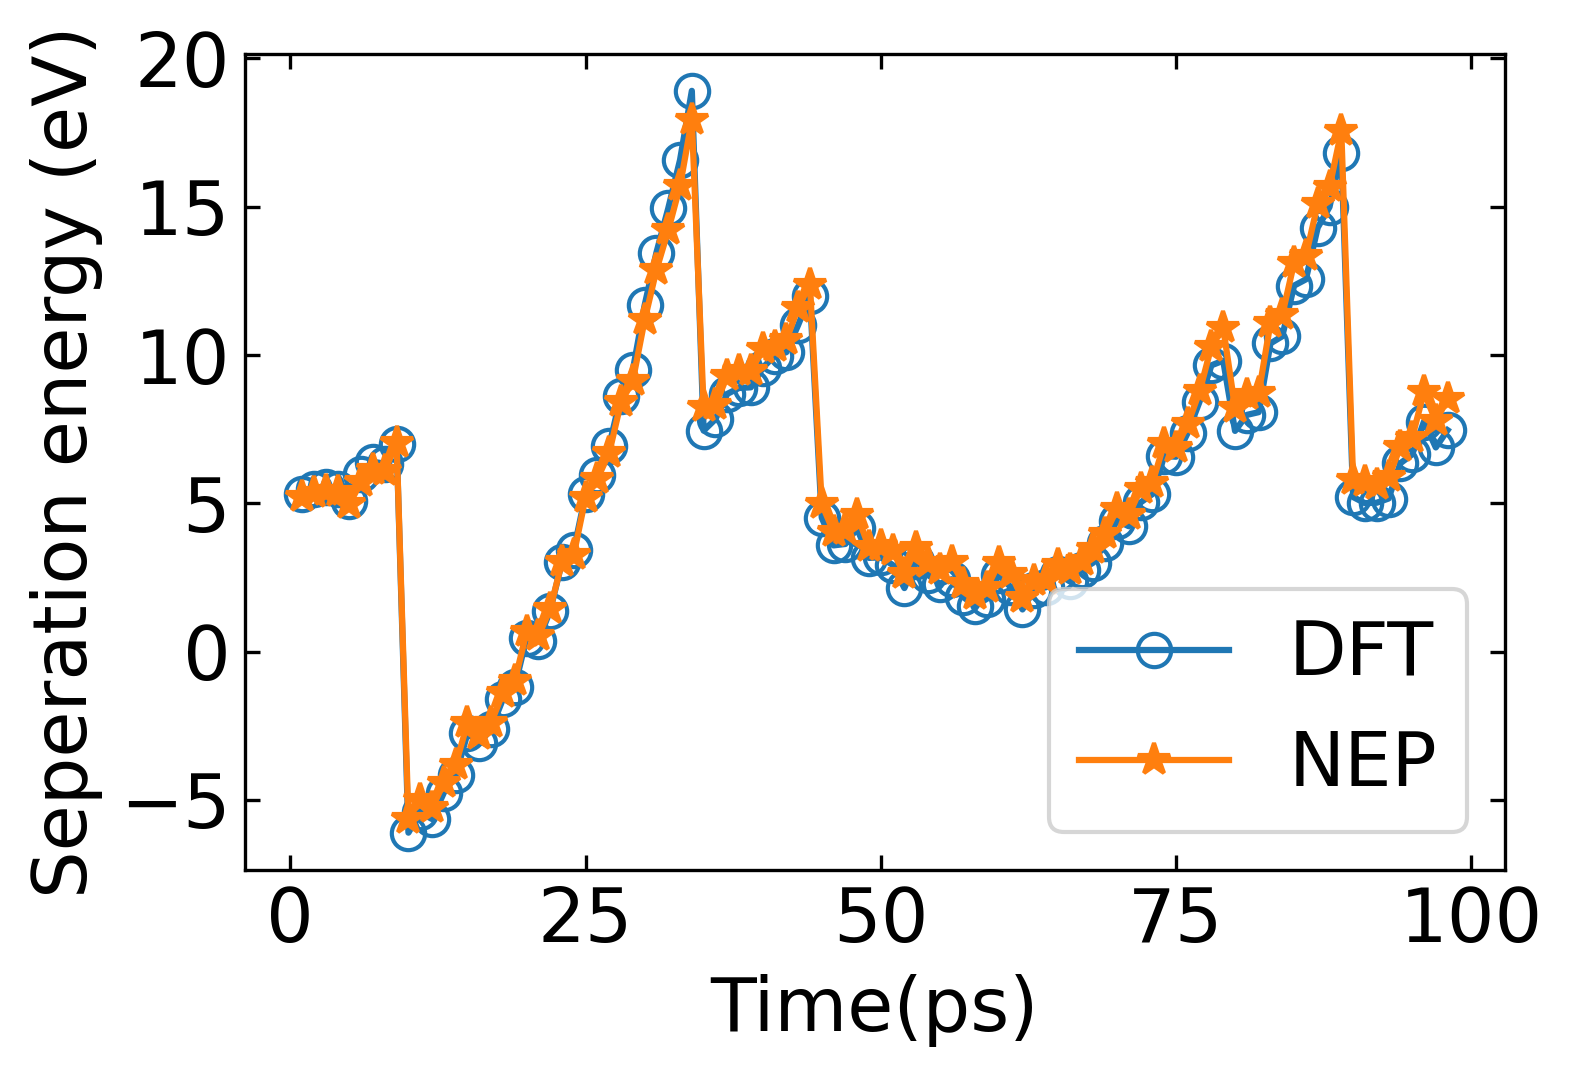

In [75]:
%matplotlib inline
from wizard.io import read_xyz
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.ticker import MultipleLocator

dft, nep = [], []

frames = read_xyz('xyz/compress.xyz')
ref_energy_dft = frames[0].info['energy']
frames[0].calc = calc
ref_energy_nep = frames[0].get_potential_energy()

for atoms in frames:
    dft.append((atoms.info['energy'] - ref_energy_dft ))
    atoms.calc = calc
    nep.append((atoms.get_potential_energy() - ref_energy_nep))

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

names = ['0','10','20','30','40','50','60','70','80','90','100','110','120','130','140','150','160','170','180','190','200','210','220','230','240','250','260','270','280','290','300','310','320','330','340','350','360','370','380','390','400','410','420','430','440','450','460','470','480','490','500','510','520','530','540','550','560','570','580','590','600','610','620','630','640','650','660','670','680','690','700','710','720','730','740','750','760','770','780','790','810','820','830','840','850','860','870','880','890','900','910','920','930','940','950','960','980','990','1000']
x = np.arange(len(names))
ax.plot(x[1:], dft[1:], '-o', label = 'DFT', fillstyle='none', markersize = 8, color='#1f77b4')
ax.plot(x[1:], nep[1:], '-*', label = 'NEP', markersize = 8, color='#ff7f0e')

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_xlabel('Time(ps)')
ax.set_ylabel('Seperation energy (eV)')
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('Seperationenergy_compress.png')

TDE计算

In [ ]:
from wizard.atoms import SymbolInfo, Morph
from wizard.io import read_xyz
import numpy as np

atoms = SymbolInfo('Fe', 'bcc', 2.834).create_bulk_atoms(supercell=(12,12,16))
group = []
thickness = 2.834 * 1
for atom in atoms:
    if atom.position[0] < thickness or atom.position[1] < thickness or atom.position[2] < thickness:
         group.append(0)
    elif atom.position[0] >= atoms.cell[0, 0] - thickness or atom.position[1] >= atoms.cell[1, 1] - thickness or atom.position[2] >= atoms.cell[2, 2] - thickness:
         group.append(1)
    else:
        group.append(2)
atoms.info['group'] = group

run_in_1 = ['potential nep.txt',
            'velocity 36', 
            'time_step 1', 
            'ensemble nvt_mttk temp 36 36', 
            'dump_restart 10000', 
            'run 10000']

run_in_2 = ['potential nep.txt', 
            'velocity 36', 
            'time_step 0', 
            'ensemble nve',
            'dump_exyz 1', 
            'run 1',
            'time_step 1 0.05', 
            'ensemble heat_nhc 36 200 0 0 1',
            'dump_exyz 1000 1 1',
            'run 10000']

Morph(atoms).gpumd('TDE_Fe/initial', run_in_1)
atoms = read_xyz('TDE_Fe/initial/restart.xyz')[-1]

directions = [(2,1,1)]
# directions = [(4,1,0)]
directions = np.array(directions)
for direction in directions:
     for pka_energy in range(43, 49, 1):
         Morph(atoms).set_pka(pka_energy, direction)
         direction_path = '-'.join([str(i) for i in direction])
         Morph(atoms).gpumd(f'TDE_Fe/{direction_path}/{pka_energy}', run_in_2)

TDEs图

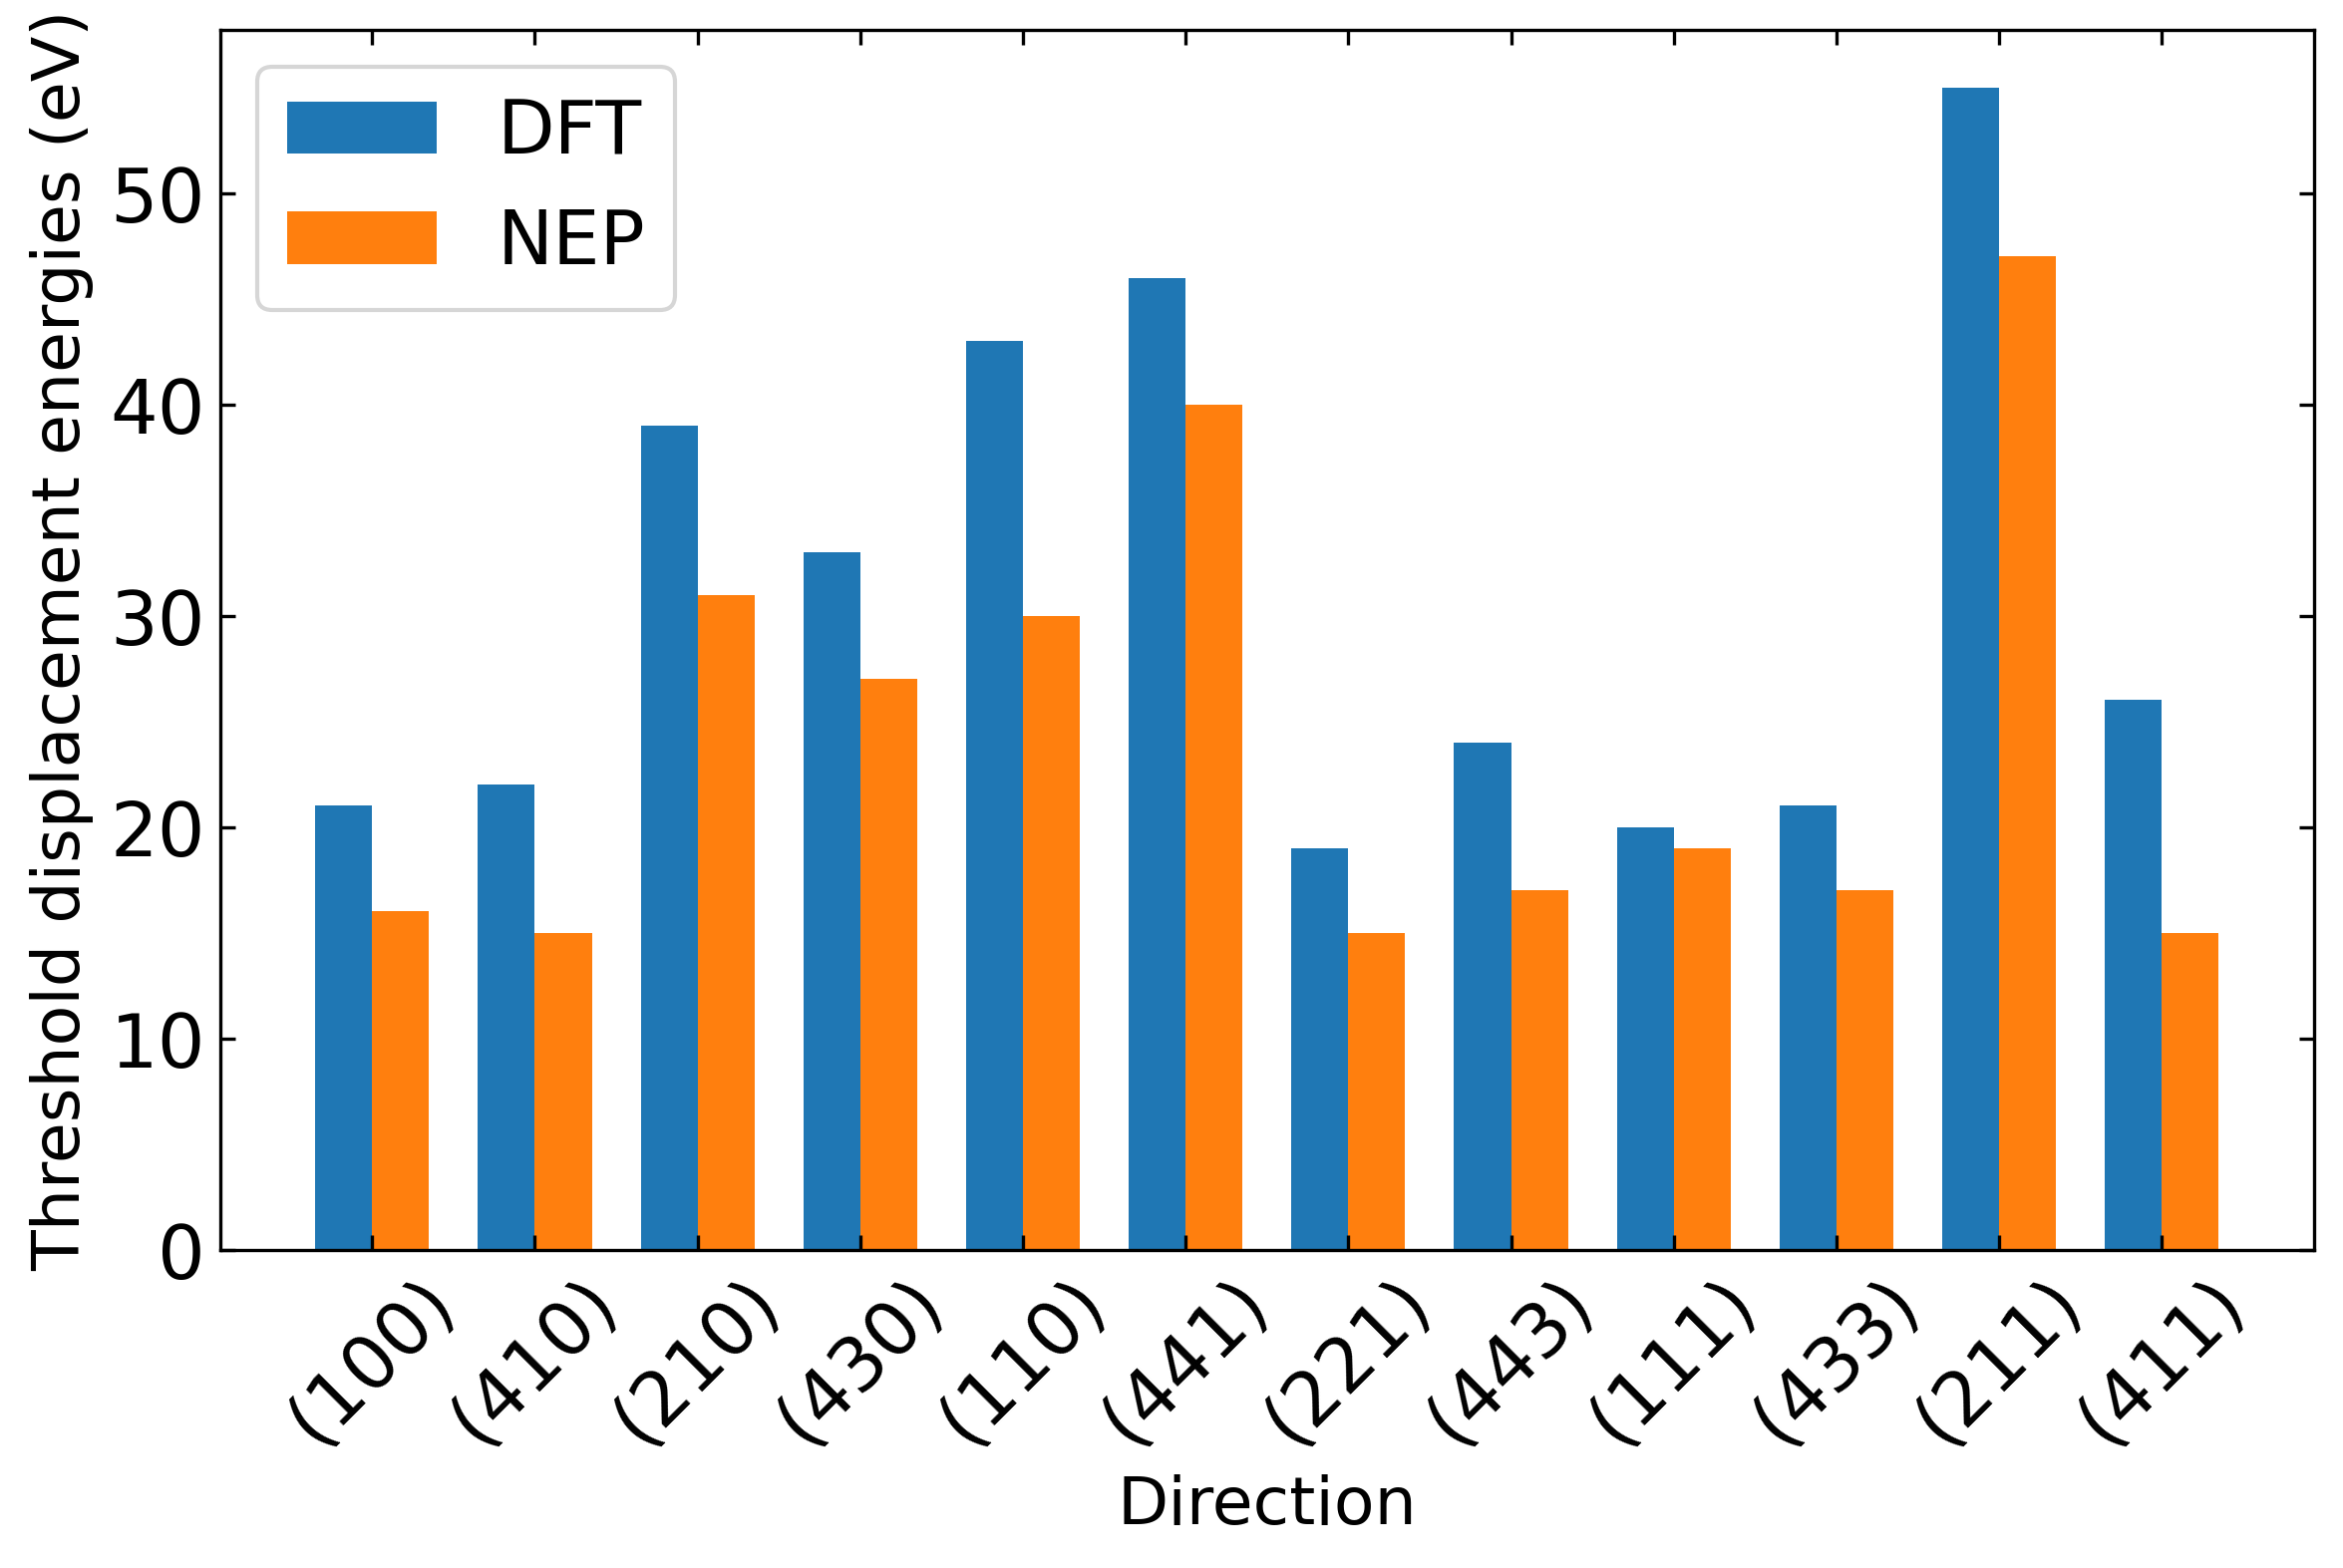

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('md_out/Dislocation_ threshold_ energy.txt')
nep = data[:,1]
dft = data[:,2]

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)

names = ['(100)', '(410)', '(210)', '(430)', '(110)', '(441)', '(221)', '(443)', '(111)', '(433)', '(211)', '(411)']
x = np.arange(len(names))
width = 0.35
ax.bar(x - width/2, dft, width, label='DFT', color='#1f77b4')
ax.bar(x + width/2, nep, width, label='NEP', color='#ff7f0e')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
ax.set_xlabel('Direction',fontsize=16)
ax.set_ylabel('Threshold displacement energies (eV)',fontsize=16)
plt.subplots_adjust(left = 0.2, bottom=0.2)
plt.legend()
fig.savefig('threshold_displacement_energies.png')

声子谱

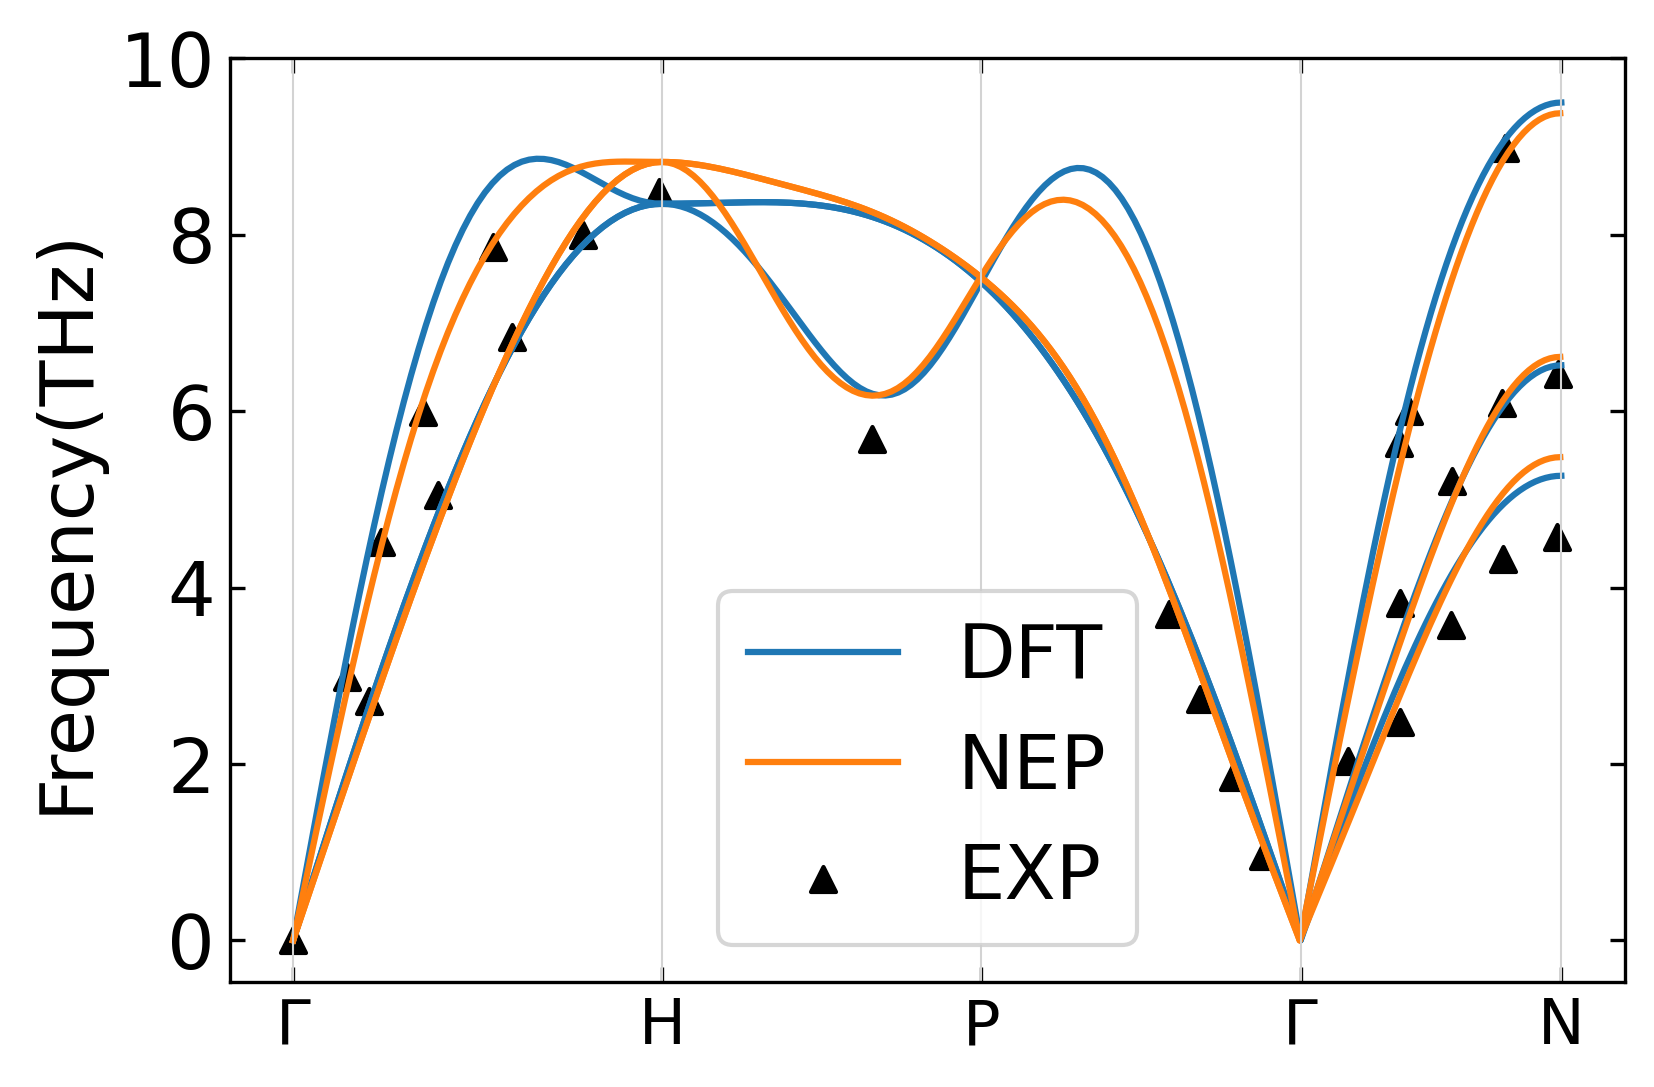

In [15]:
from matplotlib import pyplot as plt
import numpy as np
DFT = np.genfromtxt("phonon-dft.txt")
NEP = np.genfromtxt("phonon-nep.txt")
EXP = np.loadtxt("phonon-exp.txt")

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
plt.rcParams.update({"font.size": 18, "text.usetex": False})
ax.tick_params(which='major', direction='in', top=True, right=True)
DFT1 = plt.plot(DFT[:,0], DFT[:,1],color='tab:blue',label='DFT')
DFT2 = plt.plot(DFT[:,0], DFT[:,2],color='tab:blue')  
DFT3 = plt.plot(DFT[:,0], DFT[:,3],color='tab:blue')
NEP1 = plt.plot(NEP[:,0], NEP[:,1], color='tab:orange',label='NEP')
NEP2 = plt.plot(NEP[:,0], NEP[:,2], color='tab:orange',)  
NEP3 = plt.plot(NEP[:,0], NEP[:,3], color='tab:orange',)
plt.scatter(EXP[:,0], EXP[:,1], marker='^',c='black', label='EXP')

xtick_positions = [0.0, 0.35318, 0.65904, 0.9649, 1.21463]  
xtick_labels = ['Γ', 'H', 'P', 'Γ', 'N']  
plt.xticks(xtick_positions, xtick_labels,fontsize=15)
for position in xtick_positions:
    plt.axvline(x=position, color='LightGrey', linestyle='-',linewidth=0.5)
ytick_positions = np.arange(0, 11, 2)
ytick_labels = ytick_positions  # 使用刻度位置作为刻度标签
plt.yticks(ytick_positions, ytick_labels)
plt.ylabel('Frequency(THz)')
plt.legend(loc='lower center')
plt.savefig('phonopy.png')
plt.show()